In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lightkurve as lk
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks, peak_widths, peak_prominences
from mesagrid import Track
import mesa_reader as mr
# import pygyre as pg
import os
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import units as u
from scipy.ndimage import median_filter, uniform_filter1d
from itertools import combinations
%matplotlib inline

In [10]:
%config InlineBackend.figure_format='retina'
plt.rcParams.update({
    'axes.linewidth' : 1,
    'ytick.major.width' : 1,
    'ytick.minor.width' : 1,
    'xtick.major.width' : 1,
    'xtick.minor.width' : 1,
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.labelsize': 12,
    'font.family': 'serif',
    'text.usetex': False
})

In [11]:
ID = 'KIC 08626021'

In [12]:
lk = lk.search_lightcurve(f'{ID}', mission = 'Kepler', quarter=17)
lk

SearchResult containing 3 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 17 2013 Kepler      60 kplr008626021      0.0
  1 Kepler Quarter 17 2013 Kepler      60 kplr008626021      0.0
  2 Kepler Quarter 17 2013 Kepler    1800 kplr008626021      0.0

In [13]:
lc = lk.download_all().stitch()
lc

<KeplerLightCurve length=40040 LABEL="KIC 8626021" QUARTER=17 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
       Time           float32     ...    float32        float32    
------------------ -------------- ... -------------- --------------
  1559.21607148138            ——— ... -4.4436897e-03  1.2378150e-03
1559.2167527011115  9.8668164e-01 ... -4.4461638e-03  1.2382175e-03
1559.2174338208424  9.9152720e-01 ... -4.4486374e-03  1.2386198e-03
1559.2181149405224  9.7897792e-01 ... -4.4511114e-03  1.2390221e-03
1559.2187960602532  1.0072944e+00 ... -4.4535850e-03  1.2394246e-03
1559.2194772799849  1.0091982e+00 ... -4.4560591e-03  1.2398270e-03
1559.2201582996568  9.8532218e-01 ... -4.4585322e-03  1.2402294e-03
1559.2208394193876  9.5202690e-01 ... -4.4610058e-03  1.2406317e-03
1559.2215206391193  1.0114611e+00 ... -4.4634799e-03  1.2410341e-03
               ...            ... ...            ...            ...
1590.8378374074673  9.9655306e-01 ...  3.6923478e-03 -2.0405867e-03
 1590.858271715355  9.9784726e-01 ...  3.7051460e-03 -1.9638315e-03
1590.8787061233234  9.9830848e-01 ...  3.4752476e-03 -1.9195656e-03
1590.8991406313799  9.9986744e-01 ...  3.6161887e-03 -1.9398727e-03
1590.9195749394712  1.0005466e+00 ...  3.7852009e-03 -2.0090479e-03
1590.9400094476587  9.9990386e-01 ...  3.6176259e-03 -1.9151907e-03
1590.9604438559036  1.0011764e+00 ...  3.6836031e-03 -1.9694271e-03
1590.9808781642132  1.0156059e+00 ...  2.7499595e-03 -1.2037980e-03
1591.0013126725898  9.9485725e-01 ...  3.8831728e-03 -1.8678306e-03

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

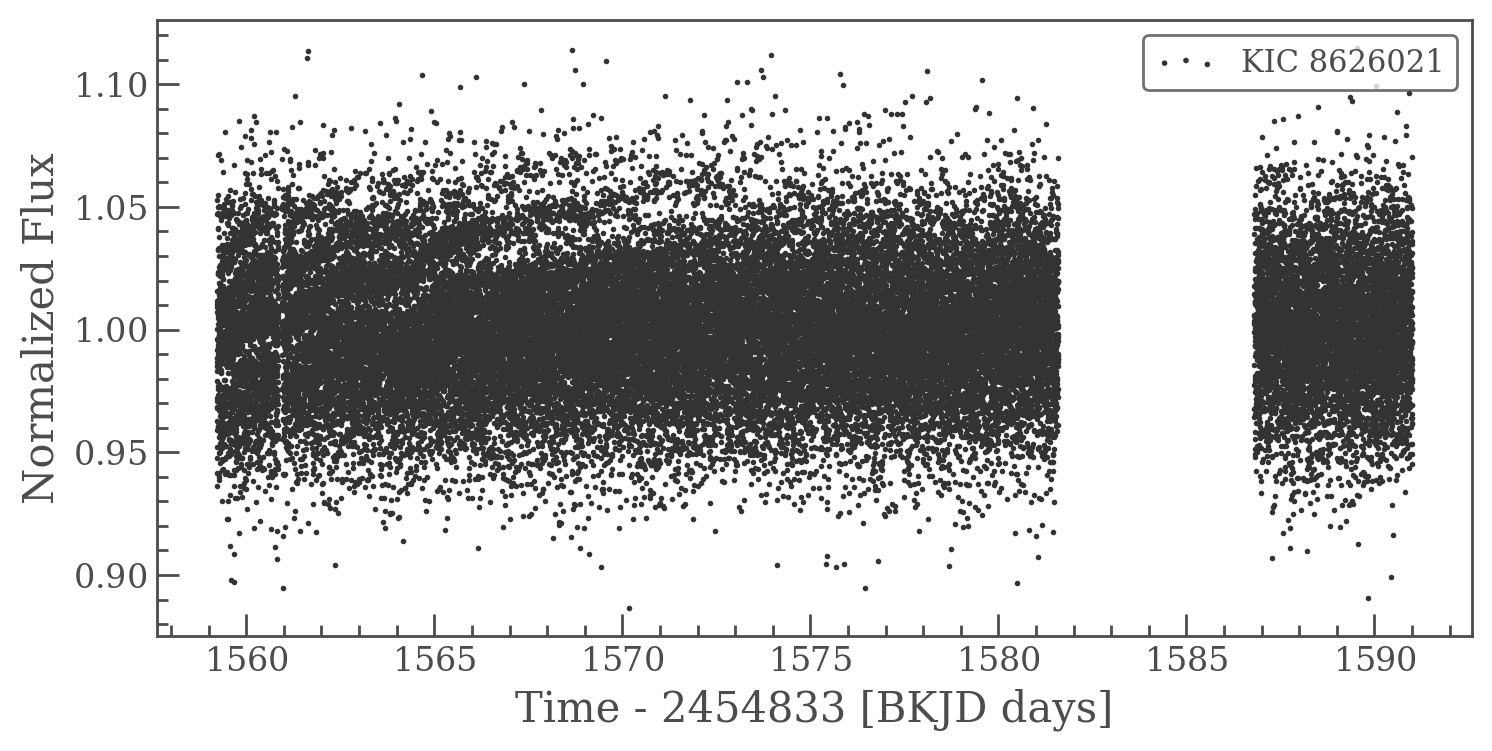

In [14]:
lc = lc.remove_outliers()
lc.scatter()

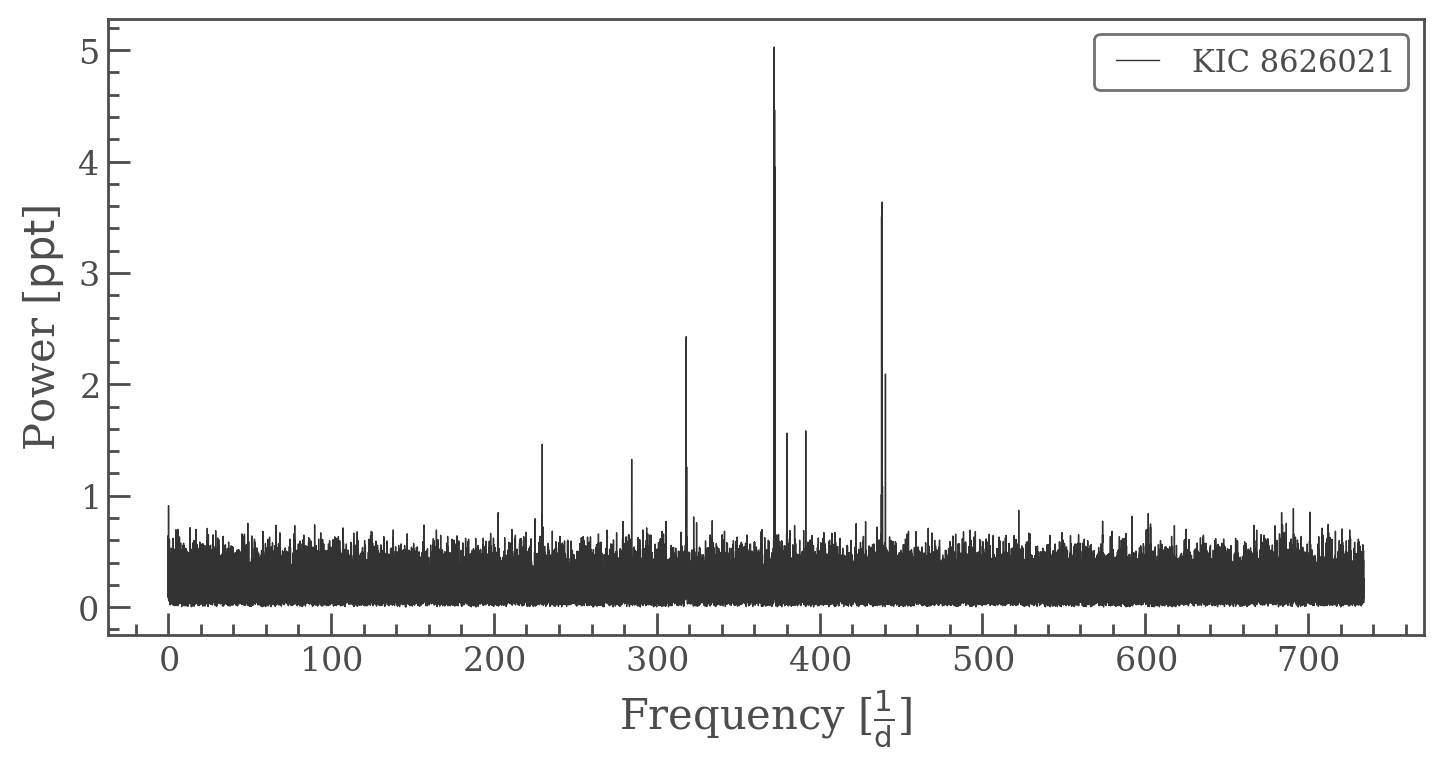

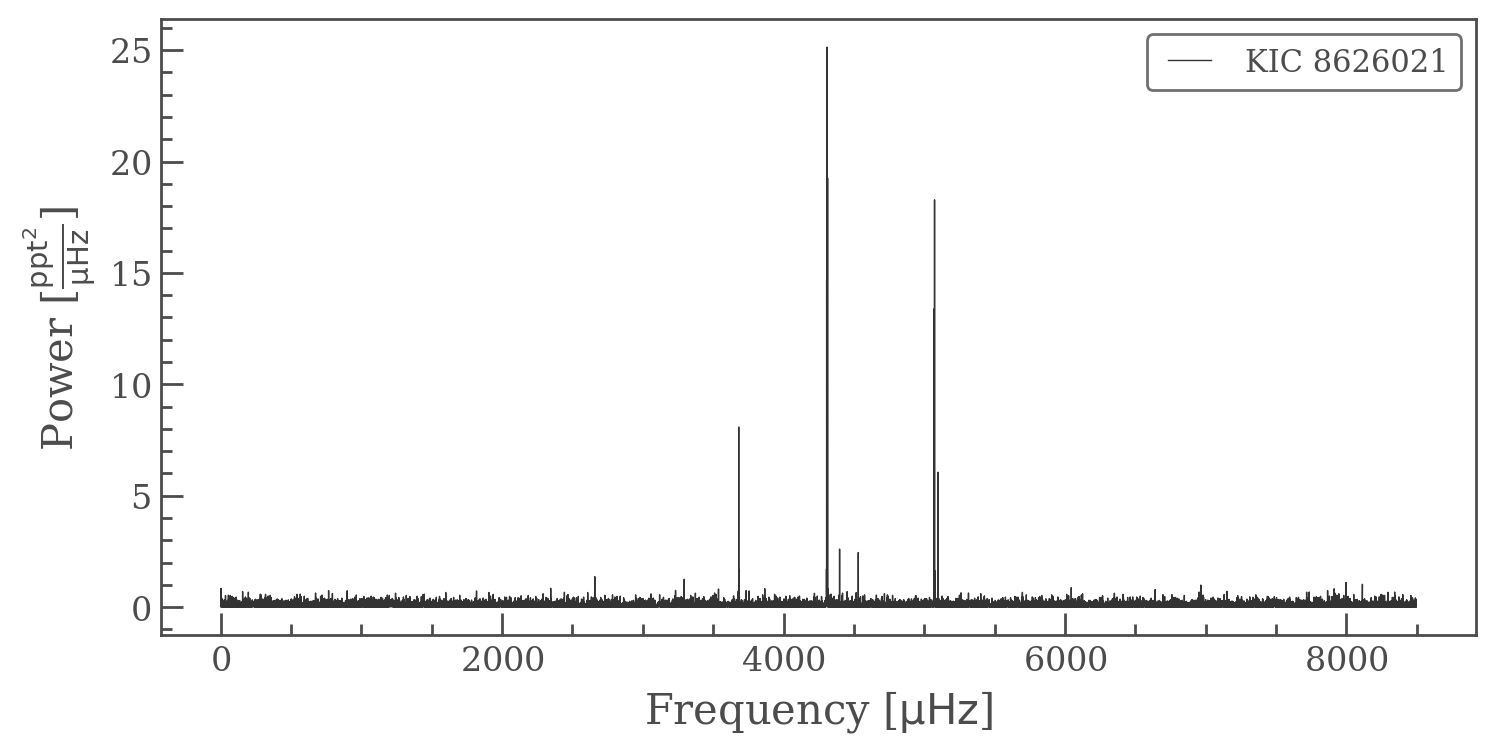

In [15]:
pg = lc.normalize(unit = 'ppt').to_periodogram()#normalization = 'psd')
pg.plot();
pg = lc.normalize(unit = 'ppt').to_periodogram(normalization = 'psd')
pg.plot();

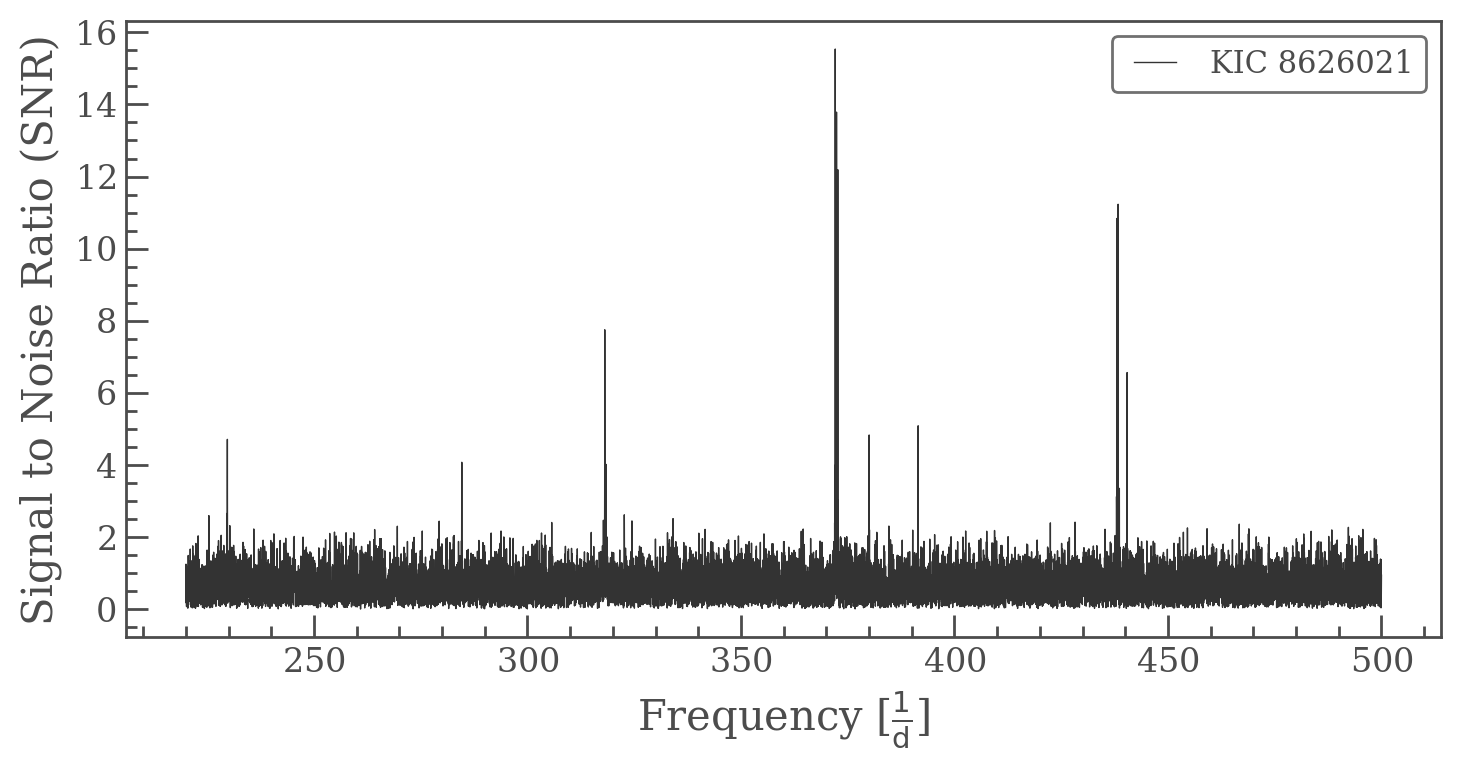

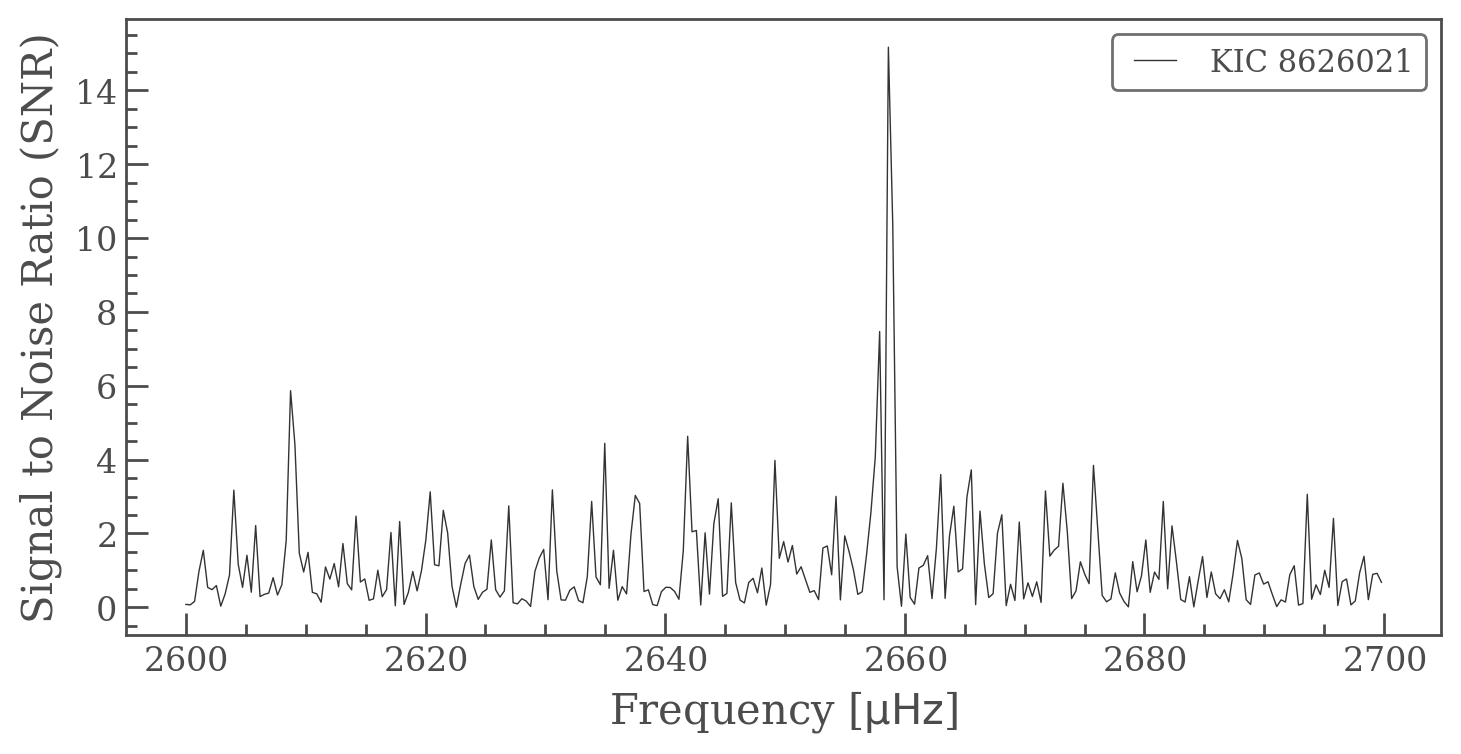

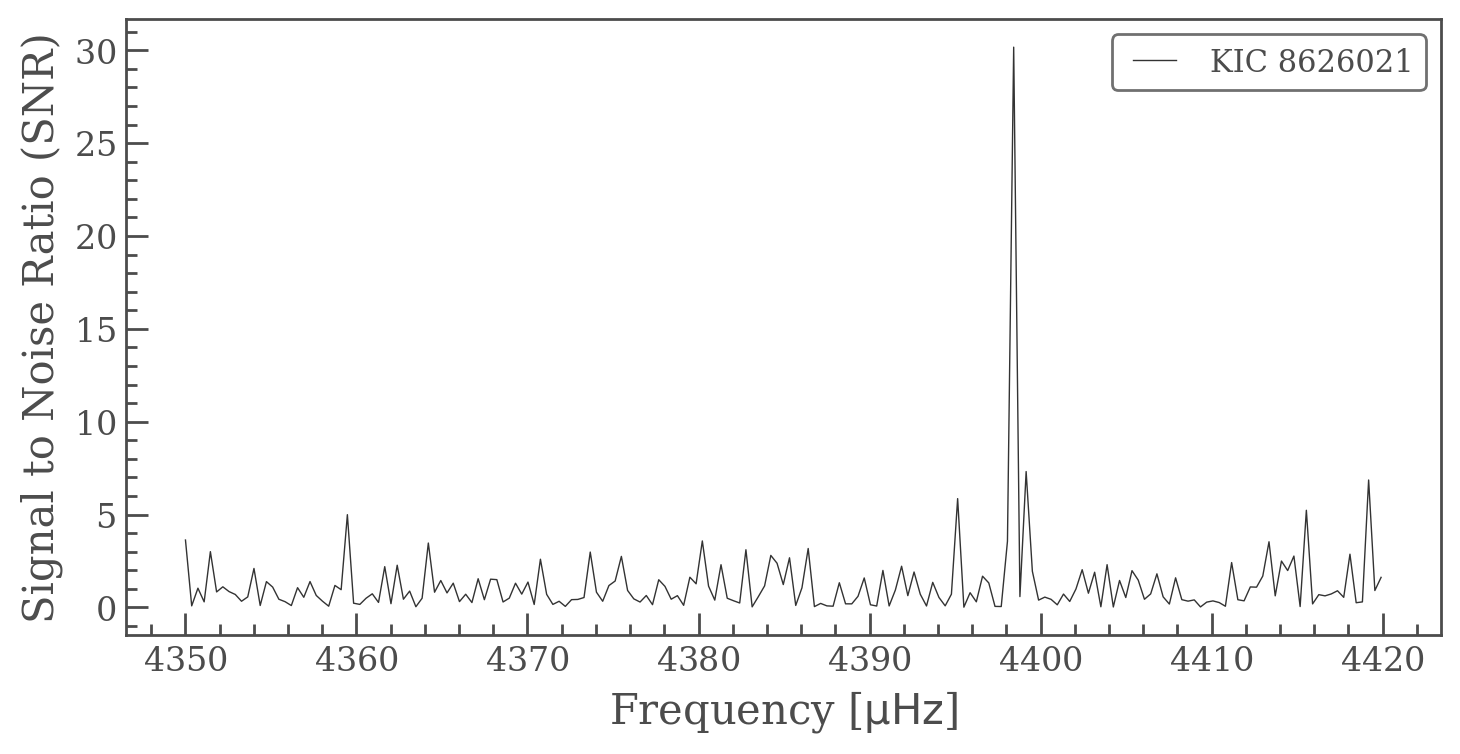

In [16]:
# zoom_pg = lc.normalize(unit = 'ppm').to_periodogram(normalization = 'psd', 
#                                                     minimum_frequency = 2500, 
#                                                     maximum_frequency = 5500).flatten()
zoom_pg = lc.normalize(unit = 'ppt').to_periodogram(minimum_frequency = 220, 
                                                    maximum_frequency = 500).flatten()
zoom_pg.plot();

zoom_pg = lc.normalize(unit = 'ppt').to_periodogram(normalization = 'psd', minimum_frequency = 2600, 
                                                    maximum_frequency = 2700).flatten()
zoom_pg.plot();

zoom_pg = lc.normalize(unit = 'ppt').to_periodogram(normalization = 'psd', minimum_frequency = 4350, 
                                                    maximum_frequency = 4420).flatten()
zoom_pg.plot();

In [17]:
seismology = zoom_pg.to_seismology()

In [20]:
# seismology.estimate_numax()

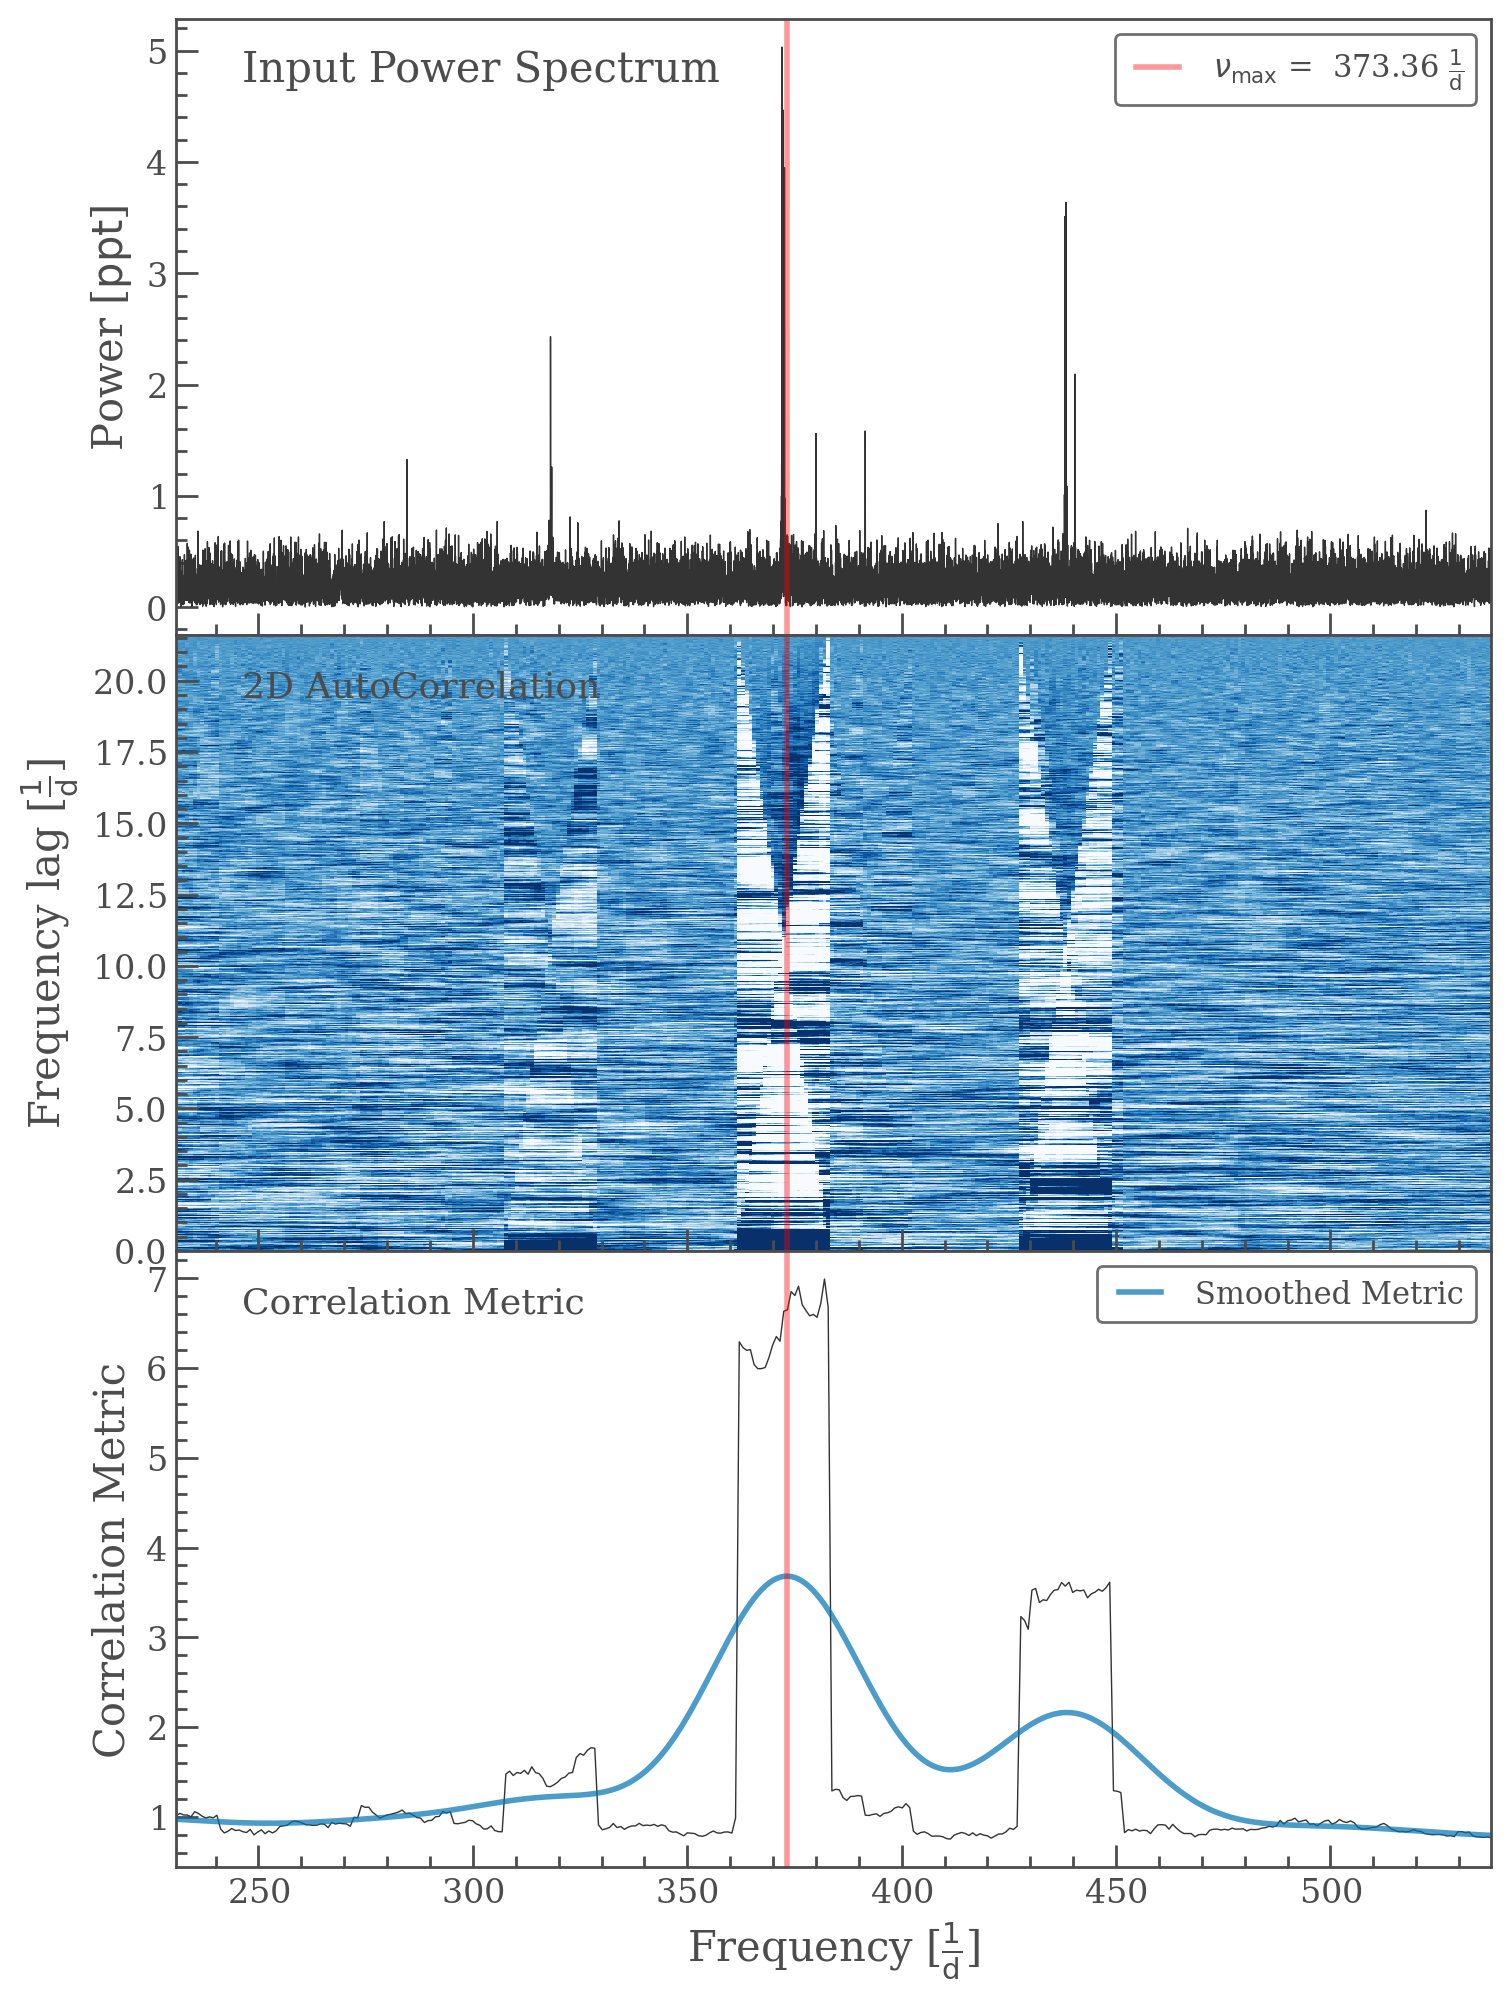

In [ ]:
seismology.diagnose_numax();

In [23]:
# seismology.estimate_deltanu()

In [25]:
# seismology.diagnose_deltanu();

In [26]:
# seismology.estimate_mass()

In [27]:
# seismology.estimate_radius()

In [28]:
# seismology.estimate_logg()

In [29]:
seismology

Seismology(ID: KIC 8626021) - no values have been computed so far.

In [30]:
# from echelle import plot_echelle #https://pypi.org/project/echelle/

In [31]:
# fig, ax = plt.subplots(figsize = (6, 5))
# plot_echelle(pg.frequency.value, pg.power.value, seismology.deltanu.value, ax = ax, cmap = 'viridis')
# ax.set_title(f'{ID}', fontsize = 15, loc = 'right')
# ax.set_xlabel(r'$\nu$ mod $\Delta\nu$ (%.2f) / $\mu Hz$'%(seismology.deltanu.value), fontsize = 15, labelpad = 15)
# ax.set_ylabel(r'Frequency $\nu$ / $\mu Hz$', fontsize = 15, labelpad = 15)

nu0_uHz   HWHM_uHz   Height_ppt2
0   2658.524290   1.916422  3.035030e-01
1   2839.698710   1.123841  1.340111e-01
2   2993.330875   1.534262  1.043206e-01
3   3293.914695   1.638352  2.700819e-01
4   3512.522472  10.975517  5.272398e-02
5   3682.016748   1.905897  1.065713e+00
6   3867.881620   3.883080  1.174400e-01
7   4220.668483   1.146874  1.083623e-01
8   4309.258882   3.574911  4.108916e+00
9   4321.950899   0.200294  7.405957e-16
10  4398.427903   1.476109  3.819961e-01
11  4531.207189   1.422977  4.190001e-01

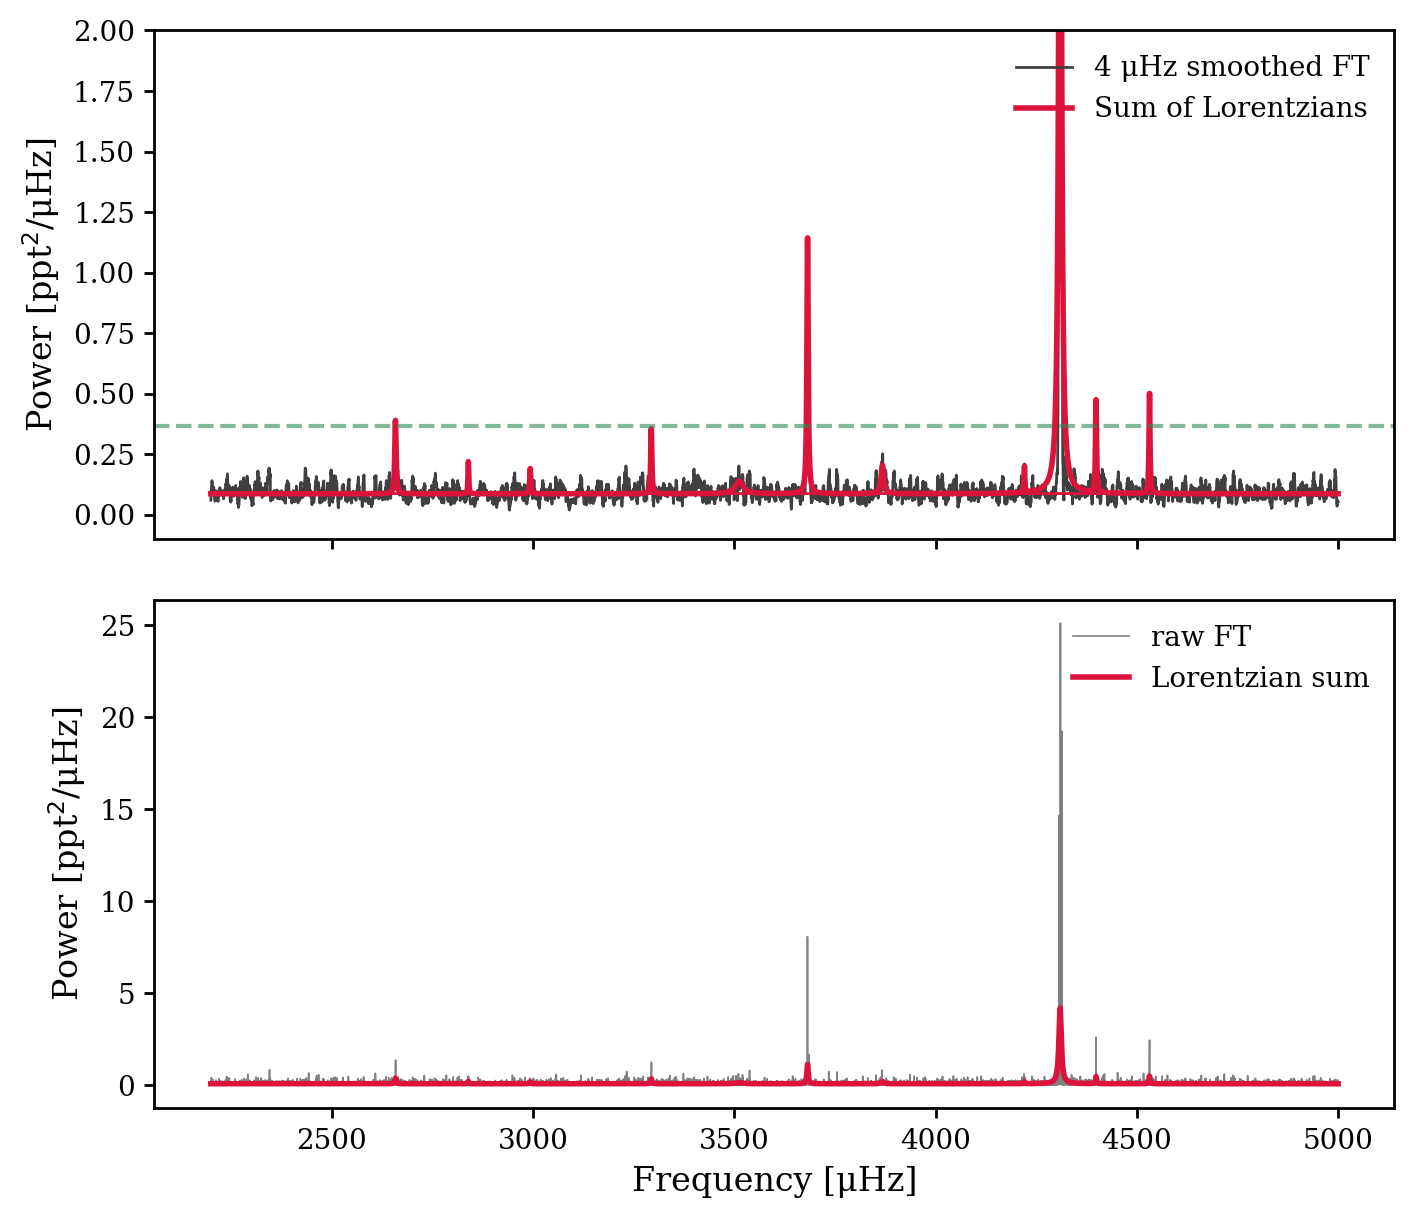

In [32]:
f = pg.frequency.to(u.uHz).value
P = pg.power.value
band = (f >= 2200) & (f <= 5000)
f, P = f[band].astype(float), P[band].astype(float)


df = np.median(np.diff(f))


def smooth_boxcar(y, width_uHz):
    w = max(3, int(round(width_uHz/df)))
    k = np.ones(w) / w
    return np.convolve(y, k, mode="same")

P_s = smooth_boxcar(P, 4.0)

# ================== 3) Lorentzian model (on POWER) ==================
def lorentzian(fr, H, nu0, gamma):
    # single component (no baseline)
    return H / (1.0 + ((fr - nu0) / gamma) ** 2)

def lorentz_sum(fr, C, *params):
    # params = [H1,nu1,g1, H2,nu2,g2, ...]
    tot = C * np.ones_like(fr)
    for H, nu, g in np.array(params).reshape(-1, 3):
        tot += lorentzian(fr, H, nu, g)
    return tot

# ================== 4) Seed peaks robustly ==================
# use prominence, not absolute height; take top K by prominence
prom_base = np.percentile(P_s, 95)
pk, props = find_peaks(P_s,
                       prominence=0.25*prom_base,            # robust
                       distance=max(1, int(round(6.0/df))))  # ≥6 μHz apart
if pk.size == 0:  # fallback slightly looser
    pk, props = find_peaks(P_s, prominence=0.15*prom_base,
                           distance=max(1, int(round(5.0/df))))

Kmax = 12
order = np.argsort(props["prominences"])[::-1][:Kmax]
pk = pk[order]

seed_centers = f[pk]
# estimate widths from the smoothed peak shapes
w_res = peak_widths(P_s, pk, rel_height=0.5)[0] * df       # FWHM in μHz
seed_widths = np.clip(0.5 * w_res, 0.4, 6.0)               # HWHM initial
seed_heights = np.clip(P_s[pk] - np.median(P_s), 1e-4, None)

# ================== 5) Fit on the *smoothed* spectrum ==================
C0 = np.percentile(P_s, 10)
theta0 = [C0]
lo, hi = [0.0], [np.inf]
for H, nu, g in zip(seed_heights, seed_centers, seed_widths):
    theta0 += [H, nu, g]
    lo     += [0.0, nu - 4.0, 0.2]      
    hi     += [np.inf, nu + 4.0, 12.0]

popt, pcov = curve_fit(lorentz_sum, f, P_s, p0=theta0,
                       bounds=(lo, hi), maxfev=200000)


Cfit = popt[0]
pars  = np.array(popt[1:]).reshape(-1, 3)
fit_tab = pd.DataFrame(
    dict(nu0_uHz=pars[:,1], HWHM_uHz=pars[:,2], Height_ppt2=pars[:,0])
).sort_values("nu0_uHz").reset_index(drop=True)
display(fit_tab.head(20))


fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(8, 7), sharex=True,
                                     gridspec_kw=dict(hspace=0.12))


ax_top.plot(f, P_s, color="0.25", lw=1.0, label="4 μHz smoothed FT")
ax_top.plot(f, lorentz_sum(f, *popt), color="crimson", lw=2.0, label="Sum of Lorentzians")


for H, nu, g in pars:
    ax_top.plot(f, Cfit + lorentzian(f, H, nu, g), color="crimson", lw=0.8, alpha=0.35)


quiet = (f < 700) | (f > 1350)
sig = 4.0 * np.median(P_s[quiet])
ax_top.axhline(sig, ls="--", color="seagreen", alpha=0.6)

ax_top.set_ylabel("Power [ppt$^2$/μHz]")
# ax_top.set_xlim(600, 1400)
ax_top.set_ylim(-0.1, 2)
ax_top.legend(frameon=False, loc="upper right")


ax_bot.plot(f, P, color="0.5", lw=0.6, label="raw FT")
ax_bot.plot(f, lorentz_sum(f, *popt), color="crimson", lw=2.0, label="Lorentzian sum")
ax_bot.set_xlabel("Frequency [μHz]")
ax_bot.set_ylabel("Power [ppt$^2$/μHz]")
ax_bot.legend(frameon=False, loc="upper right")
plt.show()

In [33]:
assert ('f' in globals()) and ('P' in globals())


Psec = 1e6 / f  # f in µHz → P in s
order = np.argsort(Psec)     
Psec  = Psec[order]
Ppow  = P[order]


Pmin, Pmax, dP = 150.0, 500.0, 0.5   
Pgrid = np.arange(Pmin, Pmax + dP/2, dP)
Ygrid = np.interp(Pgrid, Psec, Ppow) 

In [34]:

y = Ygrid - np.median(Ygrid)
w = np.hanning(y.size)
yw = y * w


F = np.fft.rfft(yw)
nu_prime = np.fft.rfftfreq(yw.size, d=dP)     
power_PT = (F.real**2 + F.imag**2)


with np.errstate(divide='ignore'):
    spacing_s = 1.0 / nu_prime
mask = (spacing_s >= 10.0) & (spacing_s <= 100.0)  


pk, props = find_peaks(power_PT[mask], prominence=np.percentile(power_PT[mask], 90)/4)
best = pk[np.argmax(power_PT[mask][pk])] if pk.size else np.argmax(power_PT[mask])
DeltaP = float(spacing_s[mask][best])

print(f"Estimated ΔP ≈ {DeltaP:.2f} s")

Estimated ΔP ≈ 12.09 s


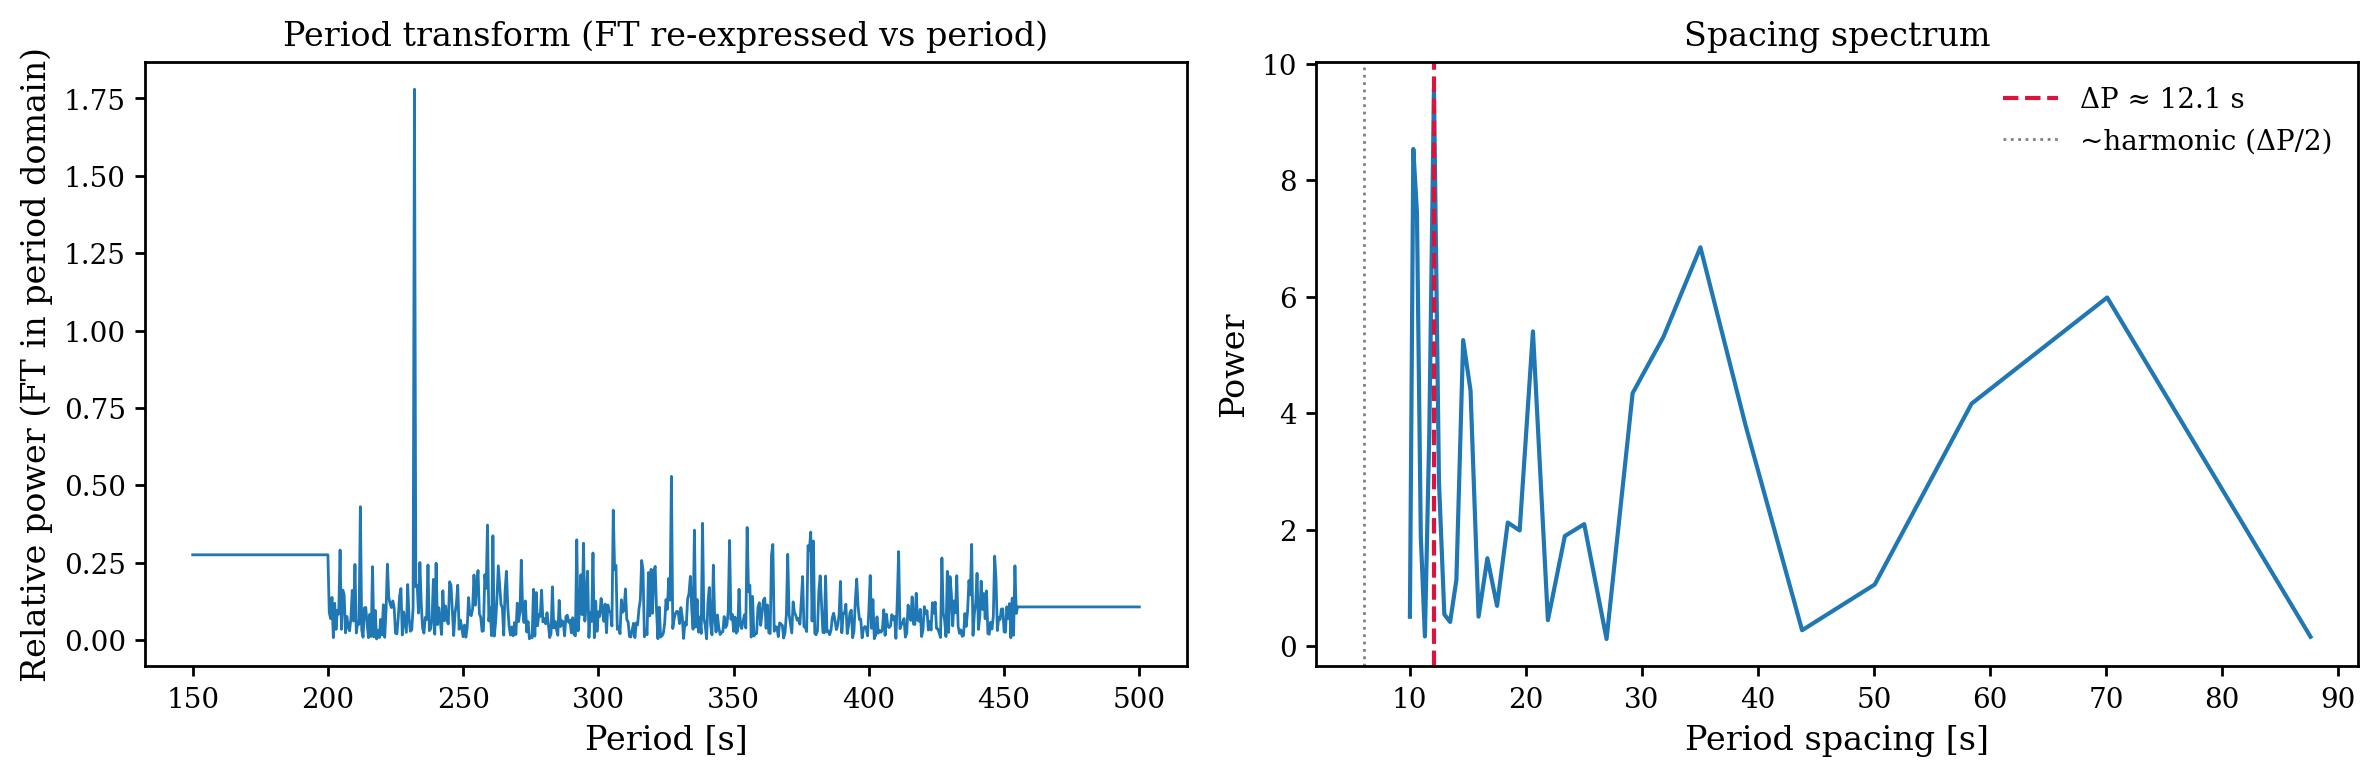

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))


ax[0].plot(Pgrid, Ygrid, color='tab:blue', lw=1)
ax[0].set_xlabel("Period [s]")
ax[0].set_ylabel("Relative power (FT in period domain)")
ax[0].set_title("Period transform (FT re-expressed vs period)")


ax[1].plot(spacing_s[mask], power_PT[mask], color='tab:blue')
ax[1].axvline(DeltaP, color='crimson', ls='--', lw=1.5, label=fr"ΔP ≈ {DeltaP:.1f} s")
ax[1].axvline(0.5*DeltaP, color='gray', ls=':', lw=1, label="~harmonic (ΔP/2)")
ax[1].set_xlabel("Period spacing [s]")
ax[1].set_ylabel("Power")
ax[1].set_title("Spacing spectrum")
ax[1].legend(frameon=False)
plt.tight_layout()
plt.show()


In [36]:
P_amp = np.sqrt(P * (df)) / 10.0

mode   f_mode_uHz  members f_members_uHz
0     1  3681.833666        1       3681.83
1     2  4309.977576        1       4309.98
2     3  4398.463936        1       4398.46
3     4  4531.375545        1       4531.38

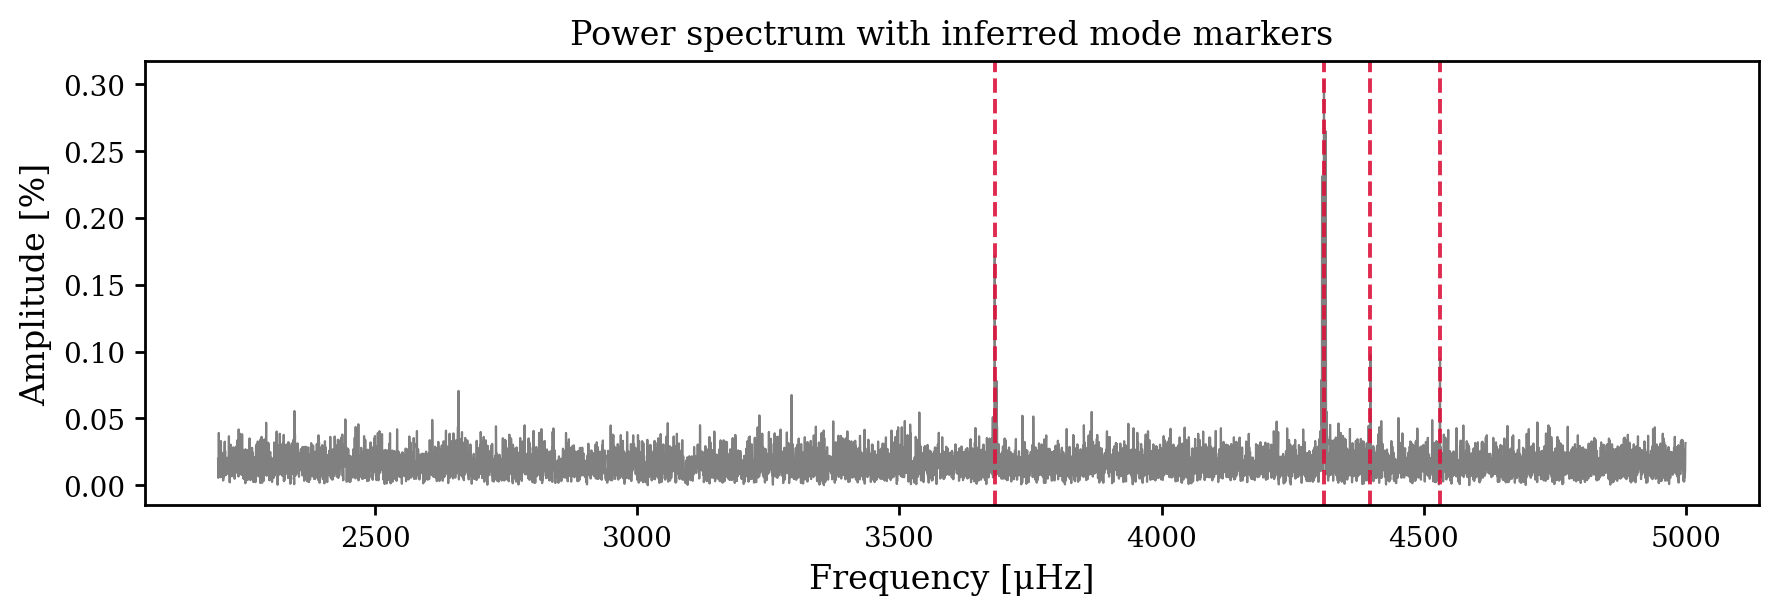

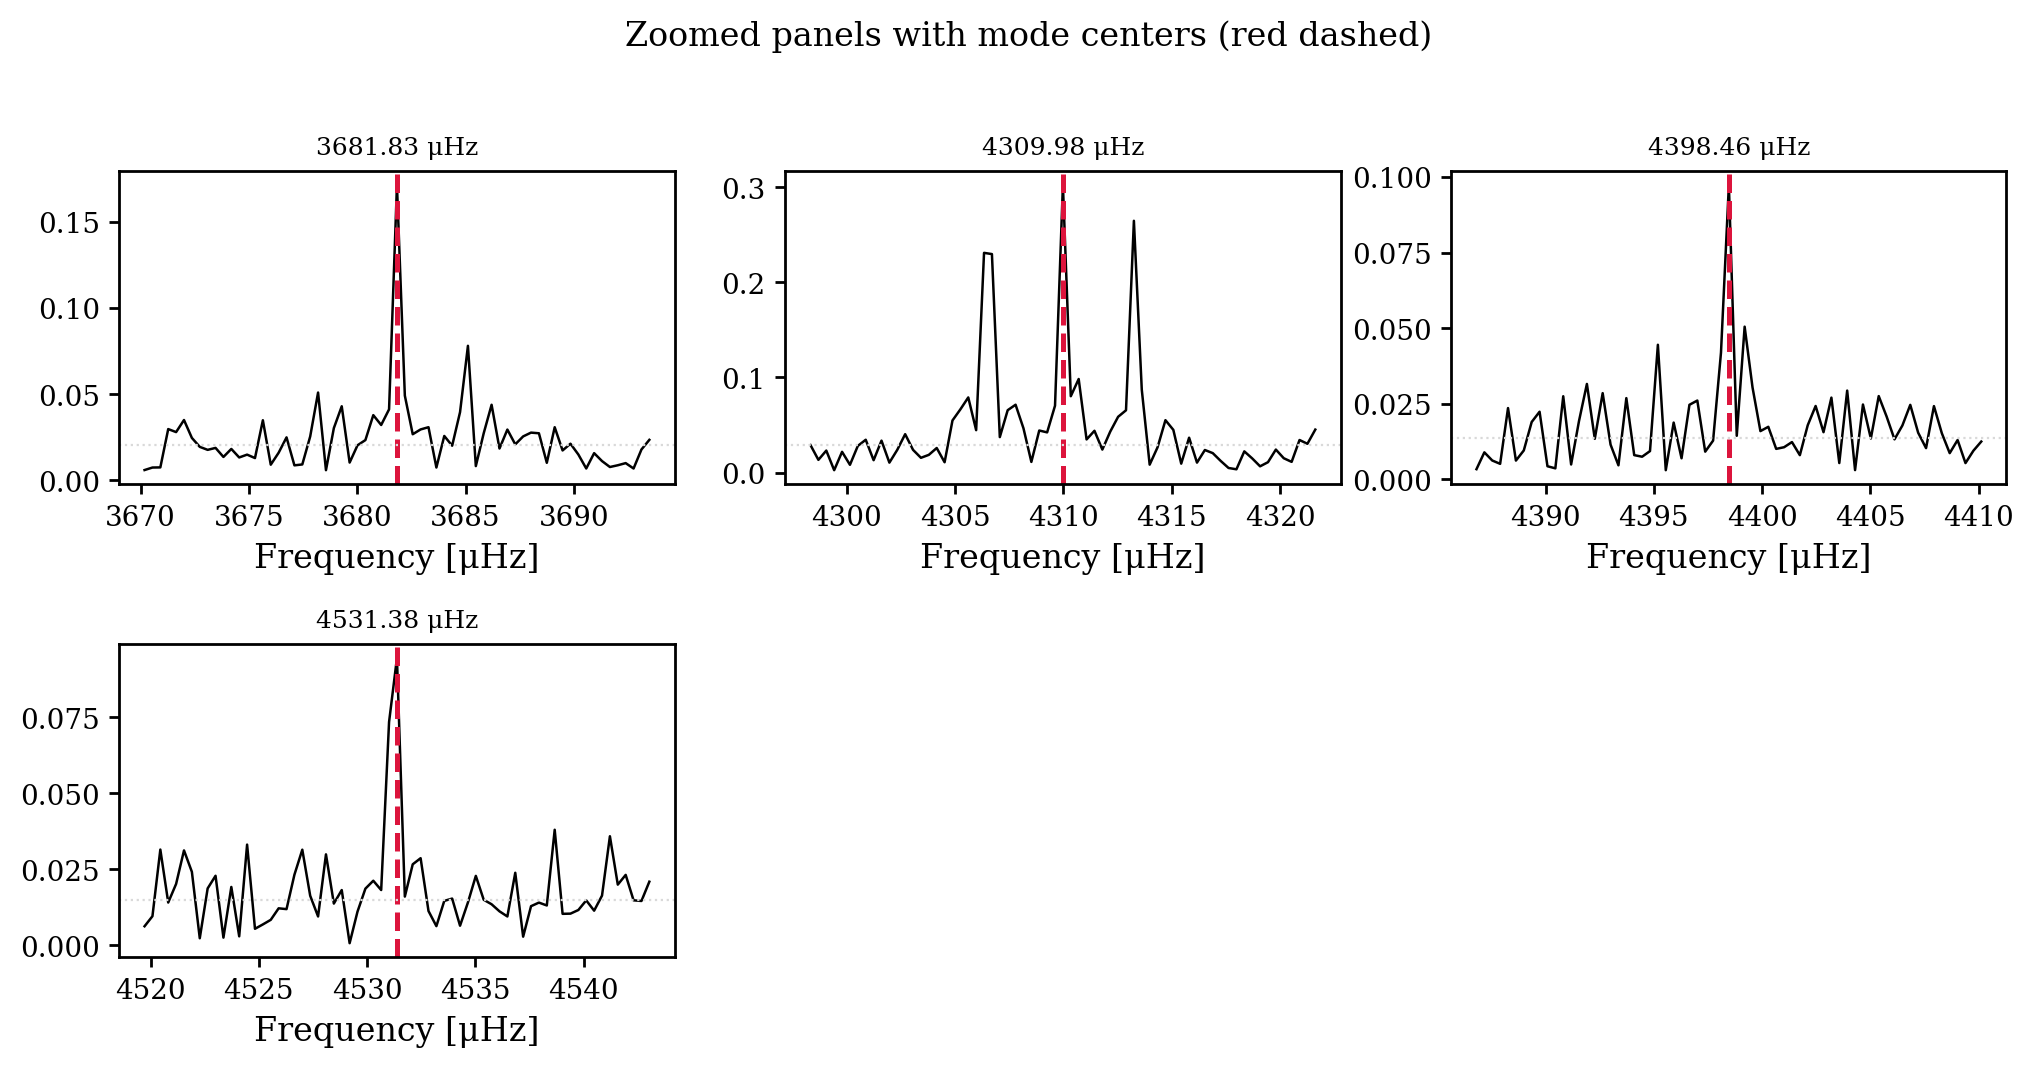

In [37]:
MED_WIDTH_uHz      = 300.0   # running
MIN_SNR            = 5.0     # keep peaks with S/N >= this on baseline-removed spectrum
PROM_FRAC          = 0.10    # prominence threshold = PROM_FRAC * 95th-percentile(residual)
MIN_SEP_uHz        = 7.0     # cluster distance to merge rotational multiplets
MAX_MODES          = 12      # keep strongest N mode clusters
REJECT_COMBOS      = True    # drop obvious linear-combination peaks
COMBO_TOL_uHz      = 1.0     # tolerance for combo checks
PANEL_HALFWIDTH_uHz= 12.0    # half-width of each zoom panel
NCOLS              = 3       # panels per row

PRIOR_FREQS_uHz    = []      


k_med = max(3, int(round(MED_WIDTH_uHz/df)) | 1)  
baseline = median_filter(P, size=k_med, mode="nearest")
R = np.clip(P - baseline, 0, None)              
mad = 1.4826 * np.median(np.abs(R - np.median(R)))
if not np.isfinite(mad) or mad <= 0:
    mad = np.std(R) if np.std(R) > 0 else 1e-12
snr = R / mad

# Peak seeding on residual
prom_thr = PROM_FRAC * np.percentile(R, 95.0)
pk, props = find_peaks(R,
                       distance=max(1, int(round(MIN_SEP_uHz/df))),
                       prominence=prom_thr)
if pk.size == 0:
    raise RuntimeError("No peaks found — relax PROM_FRAC or MIN_SNR.")

keep = snr[pk] >= MIN_SNR   # keeping high-S/N peaks only
pk = pk[keep]
if pk.size == 0:
    raise RuntimeError("No peaks pass MIN_SNR — lower MIN_SNR or widen band.")

order = np.argsort(R[pk])[::-1]
pk = pk[order][:max(MAX_MODES, 1)]
f_pk = f[pk]  # seed frequencies

# drop obvious linear combinations 
if REJECT_COMBOS and f_pk.size >= 3:
    mask = np.ones_like(f_pk, dtype=bool)

    for i in range(f_pk.size):
        if not mask[i]:
            continue
        fi = f_pk[i]
        combos = []
        for j in range(i):
            for k in range(j):
                fj, fk = f_pk[j], f_pk[k]
                combos.extend([abs(fj+fk), abs(fj-fk)])
        if len(combos):
            combos = np.asarray(combos)
            if np.min(np.abs(combos - fi)) < COMBO_TOL_uHz:
                mask[i] = False
    f_pk = f_pk[mask]

    pk = np.array([np.argmin(np.abs(f - val)) for val in f_pk])


seeds = np.sort(pk)
clusters = []
if seeds.size:
    cur = [seeds[0]]
    for idx in seeds[1:]:
        if (f[idx] - f[cur[-1]]) <= MIN_SEP_uHz:
            cur.append(idx)
        else:
            clusters.append(cur); cur = [idx]
    clusters.append(cur)

mode_freqs = []
for cl in clusters:
    w = np.maximum(R[cl], 1e-12)
    mode_freqs.append(np.sum(f[cl]*w)/np.sum(w))
mode_freqs = np.sort(np.array(mode_freqs))


mrows = []
for i, cl in enumerate(clusters, 1):
    mrows.append({
        "mode": i,
        "f_mode_uHz": mode_freqs[i-1],
        "members": len(cl),
        "f_members_uHz": ", ".join([f"{f[j]:.2f}" for j in cl])
    })
modes_df = pd.DataFrame(mrows)
display(modes_df)


fig, ax = plt.subplots(1, 1, figsize=(9, 3.2))
ax.plot(f, P_amp, color="0.5", lw=0.8)
for fm in mode_freqs:
    ax.axvline(fm, color="crimson", ls="--", lw=1.4, alpha=0.9)
for fp in PRIOR_FREQS_uHz:
    ax.axvline(fp, color="royalblue", ls="-.", lw=1.2, alpha=0.8)
ax.set_xlabel("Frequency [μHz]"); 
# ax.set_ylabel("Power [ppt$^2$/μHz]")
ax.set_ylabel("Amplitude [%]")
ax.set_title("Power spectrum with inferred mode markers")
plt.tight_layout()
plt.show()

n = len(mode_freqs)
if n == 0:
    print("No modes to plot.")
else:
    ncols = NCOLS
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(3.4*ncols, 2.6*nrows), squeeze=False)
    axes = axes.ravel()

    for i, fm in enumerate(mode_freqs):
        axp = axes[i]
        m = (f >= fm - PANEL_HALFWIDTH_uHz) & (f <= fm + PANEL_HALFWIDTH_uHz)
        axp.plot(f[m], P_amp[m], color="k", lw=0.9)
        axp.axvline(fm, color="crimson", ls="--", lw=1.8)  # observed mode (red)
        for fp in PRIOR_FREQS_uHz:
            if (fm - PANEL_HALFWIDTH_uHz) <= fp <= (fm + PANEL_HALFWIDTH_uHz):
                axp.axvline(fp, color="royalblue", ls="-.", lw=1.5, alpha=0.9)  # optional theory (blue)
        axp.set_title(f"{fm:.2f} μHz", fontsize=9)
        axp.set_xlabel("Frequency [μHz]"); 
        # axp.set_ylabel("Power")
        ax.set_ylabel("Amplitude [%]")
        axp.axhline(np.median(P_amp[m]), color="0.85", lw=0.8, ls=":")

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Zoomed panels with mode centers (red dashed)", y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()

Mode identification

In [38]:
f = pg.frequency.to(u.uHz).value
P = pg.power.value


band = (f >= 2200) & (f <= 5000)
f, P = f[band].astype(float), P[band].astype(float)
T_days = float(lc.time.jd.max() - lc.time.jd.min())

#  best ΔΠ_1 (seconds) else 41.1 s
dP1_s = float(globals().get("dP1_s", globals().get("dP_fund", 41.1)))


if "centers_uHz" not in globals():
    df = np.median(np.diff(f))
    def smooth_box(y, width_uHz):
        w = max(3, int(round(width_uHz/df)))
        k = np.ones(w)/w
        return np.convolve(y, k, mode="same")
    P_s = smooth_box(P, 4.0)
    prom_base = np.percentile(P_s, 95)
    pk, props = find_peaks(P_s, prominence=0.25*prom_base, distance=max(1, int(round(6.0/df))))
    if pk.size == 0:
        pk, props = find_peaks(P_s, prominence=0.15*prom_base, distance=max(1, int(round(5.0/df))))
    # keep top 12 by prominence
    order = np.argsort(props["prominences"])[::-1][:12]
    centers_uHz = f[pk[order]]

print(f"T_days = {T_days:.3f} d,  ΔΠ1 = {dP1_s:.2f} s,  N(centers) = {len(np.atleast_1d(centers_uHz))}")


T_days = 31.794 d,  ΔΠ1 = 41.10 s,  N(centers) = 12


In [39]:

rayleigh_uHz = 1e6 / (T_days * 86400.0)
dP2_s = dP1_s / np.sqrt(3.0)  # asymptotic relation wooho

def refine_phi(periods_s, dP_s, pmin, pmax, weights=None):

    P = np.asarray(periods_s, float)
    m = (P >= pmin) & (P <= pmax)
    P = P[m]
    if P.size == 0:
        return pmin
    W = np.ones_like(P) if weights is None else np.asarray(weights, float)[m]
    phis = np.linspace(pmin, pmin + dP_s, 2001, endpoint=False)

    scores = []
    for phi in phis:
        k = np.rint((P - phi)/dP_s)
        dist = np.abs(P - (phi + k*dP_s))
        scores.append(np.average(dist, weights=W))
    return float(phis[np.argmin(scores)])

def nearest_comb_residual(P_s, dP_s, phi_s):
    k = np.rint((P_s - phi_s)/dP_s)
    P_model = phi_s + k*dP_s
    return (P_s - P_model), k.astype(int), P_model


if 'centers_uHz' in globals():
    nu_candidates = np.asarray(centers_uHz, float)
else:

    df_uHz = np.median(np.diff(f))
    def smooth_box(y, w_uHz):
        w = max(3, int(round(w_uHz/df_uHz)))
        k = np.ones(w)/w
        return np.convolve(y, k, mode='same')
    P_s = smooth_box(P, 4.0)
    prom_base = np.percentile(P_s, 95)
    pk, props = find_peaks(P_s, prominence=0.25*prom_base, distance=max(1,int(round(6.0/df_uHz))))
    if pk.size == 0:
        pk, props = find_peaks(P_s, prominence=0.15*prom_base, distance=max(1,int(round(5.0/df_uHz))))
    order = np.argsort(props["prominences"])[::-1][:20]
    nu_candidates = f[pk[order]]


periods_s = 1e6/nu_candidates
pmin, pmax = 780.0, 1600.0



def local_power_weight(nu0, span=5.0):
    m = (f >= nu0-span) & (f <= nu0+span)
    return float(P[m].max()) if np.any(m) else 1.0

weights = np.array([local_power_weight(nu) for nu in nu_candidates])

phi1 = refine_phi(periods_s, dP1_s, pmin, pmax, weights=weights)
phi2 = refine_phi(periods_s, dP2_s, pmin, pmax, weights=weights)


rows = []
tolP_s = 0.5*dP1_s   
for nu in nu_candidates:
    P0 = 1e6/nu
    r1, k1, P1_mod = nearest_comb_residual(P0, dP1_s, phi1)
    r2, k2, P2_mod = nearest_comb_residual(P0, dP2_s, phi2)

    if abs(r1) < abs(r2):
        ell, k_used, resid_s, P_model = 1, int(k1), float(r1), float(P1_mod)
    else:
        ell, k_used, resid_s, P_model = 2, int(k2), float(r2), float(P2_mod)

    assigned = (abs(resid_s) <= tolP_s)
    rows.append({
        "nu_uHz": float(nu),
        "P_s": float(P0),
        "ell": ell if assigned else None,
        "k": k_used if assigned else None,
        "resid_s": resid_s,
        "P_model_s": P_model
    })

assign = pd.DataFrame(rows).sort_values("nu_uHz").reset_index(drop=True)

######################################################################### trying to detect rotational splitting around each base component 

def find_multiplet(nu0, neighborhood=12.0, min_peaks=2):
    nearmask = (f >= nu0-neighborhood) & (f <= nu0+neighborhood)
    ff = f[nearmask]; PP = P[nearmask]
    # finding local peaks
    pk, props = find_peaks(PP, prominence=np.percentile(PP,95)*0.15, distance=max(1,int(round(2.0/np.median(np.diff(ff))))))
    if pk.size < min_peaks:
        return None
    nu_peaks = ff[pk]
    nu_peaks = np.sort(nu_peaks)
    
    if nu_peaks.size >= 3:
        dnu = np.median(np.diff(nu_peaks))
        return {"nu_peaks":nu_peaks, "dnu_uHz":float(dnu)}  # estimate a common spacing by median nearest-neighbor spacing
    return None

mult_rows = []
for i, r in assign.iterrows():
    info = find_multiplet(r["nu_uHz"])
    mult_rows.append(info if info is not None else {})
assign["dnu_uHz"] = [m.get("dnu_uHz", np.nan) for m in mult_rows]

# infering m given dnu and ℓ (very rough): label central as m≈0 and neighbors by ±1, ±2 if spacing ~dnu
def label_members(nu0, nu_list, dnu, ell):
    # simple integer rounding of (nu-nu0)/dnu
    m_vals = []
    for nu in nu_list:
        m = int(np.rint((nu - nu0)/dnu))
        if abs(m) <= ell:  # only valid range
            m_vals.append((nu, m))
    return m_vals

m_labels = []
for i, r in assign.iterrows():
    if np.isfinite(r["dnu_uHz"]) and (r["ell"] in (1,2)):
        mm = find_multiplet(r["nu_uHz"])
        if mm:
            labeled = label_members(r["nu_uHz"], mm["nu_peaks"], mm["dnu_uHz"], r["ell"])
            m_labels.append(labeled)
        else:
            m_labels.append([])
    else:
        m_labels.append([])

assign["m_members"] = m_labels

# 7) final tidy view
assign_display = assign.copy()
assign_display["mode_label"] = assign_display.apply(
    lambda r: (f"ℓ={r['ell']}, k={r['k']}" if pd.notnull(r['ell']) else "—"), axis=1
)
assign_display = assign_display[["nu_uHz","P_s","mode_label","resid_s","dnu_uHz","m_members"]]
display(assign_display)

nu_uHz         P_s  mode_label    resid_s   dnu_uHz  \
0   2658.232199  376.189860  ℓ=2, k=-17  -0.415506  4.005555   
1   2839.938756  352.120269  ℓ=2, k=-18  -0.756001  2.184848   
2   2993.606426  334.045248  ℓ=2, k=-19   4.898073  3.277273   
3   3294.023078  303.580144  ℓ=2, k=-20  -1.837935  2.548990   
4   3511.415492  284.785438  ℓ=1, k=-12  -2.014562  2.548990   
5   3683.290232  271.496390  ℓ=2, k=-21 -10.192593  3.277273   
6   3868.638203  258.488891  ℓ=2, k=-22   0.529005  2.184848   
7   4220.762934  236.923991  ℓ=2, k=-23   2.693201  2.913131   
8   4308.156869  232.117824  ℓ=2, k=-23  -2.112966  3.459343   
9   4322.722525  231.335690  ℓ=2, k=-23  -2.895100  2.548990   
10  4398.463936  227.352097  ℓ=2, k=-23  -6.878693  3.277273   
11  4530.647263  220.719015  ℓ=2, k=-24  10.217320  2.548990   

                                            m_members  
0   [(2649.128663868449, -2), (2654.2266434277835,...  
1   [(2835.5690591812527, -2), (2837.3897661667293...  
2   [(2985.5953147845244, -2), (2987.780163167096,...  
3   [(3287.8326743736393, -2), (3291.4740883445925...  
4   [(3510.3230679988797, 0), (3512.8720577785466,...  
5   [(3675.6432622801544, -2), (3678.192252059822,...  
6   [(3864.26850597553, -2), (3866.8174957551973, ...  
7   [(4214.208388584132, -2), (4217.849802555085, ...  
8   [(4306.336162049248, -1), (4309.977576020201, ...  
9   [(4321.630100727251, 0), (4323.814949109823, 0...  
10  [(4391.909390366648, -2), (4395.186662940506, ...  
11  [(4524.456858909344, -2), (4527.005848689011, ...

Full spectrum with mode markers + multiplets

/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_40742/3103323979.py:38: UserWarning: Glyph 8467 (\N{SCRIPT SMALL L}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
/Users/surendrabhattarai/anaconda3/envs/juliet-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8467 (\N{SCRIPT SMALL L}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)


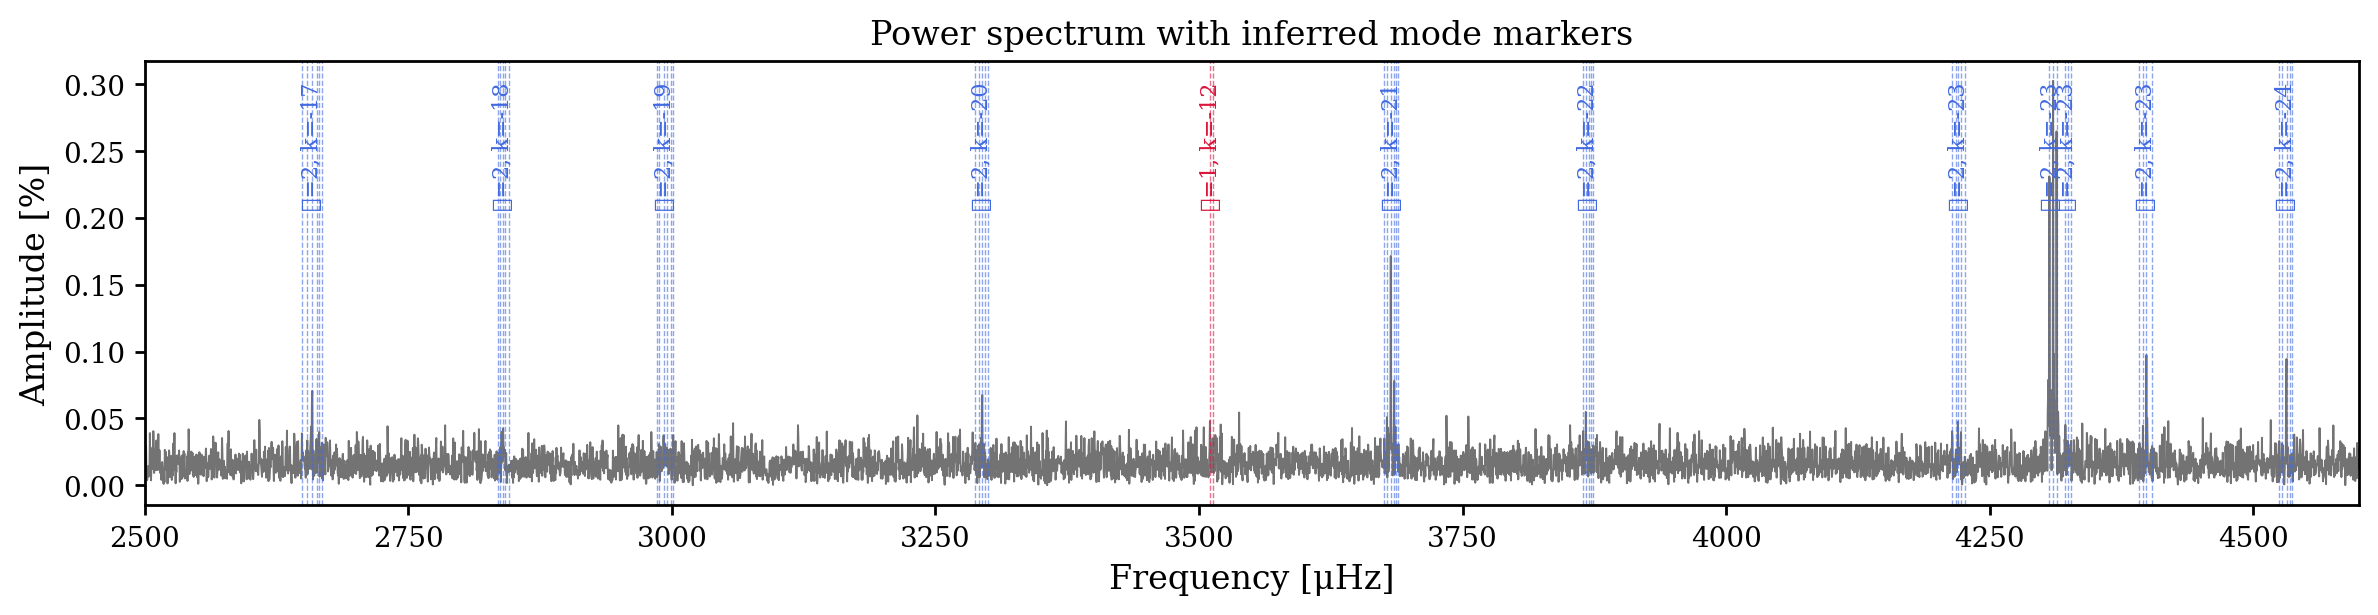

In [40]:
modes = assign_display[['nu_uHz','P_s','mode_label','resid_s','dnu_uHz','m_members']].copy()

# --- helpers from your table ---
def ell_from_label(s: str) -> int:
    # expects strings like "ℓ=2, k=-23"
    return int(s.split(',')[0].split('=')[1])

colors = {1: "crimson", 2: "royalblue"}

modes_plot = modes.sort_values("nu_uHz").reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 3.2))
ax.plot(f, P_amp, color="0.45", lw=0.7)
ax.set_xlim(f.min(), f.max())
ax.set_xlabel("Frequency [μHz]")
# ax.set_ylabel("Power [ppt$^2$/μHz]")
ax.set_ylabel("Amplitude [%]")
ax.set_title("Power spectrum with inferred mode markers")
ax.set_xlim(2500,4600)

for _, row in modes_plot.iterrows():
    ell = ell_from_label(row["mode_label"])
    c   = colors.get(ell, "tab:gray")

    # mode center
    # ax.axvline(row["nu_uHz"], color=c, ls="--", lw=1.6, alpha=0.9, zorder=3)

    # annotate ℓ,k above the line
    ax.text(row["nu_uHz"], ax.get_ylim()[1]*0.95, row["mode_label"],
            color=c, rotation=90, ha="center", va="top", fontsize=8)

    # optional: draw rotational multiplet members (thin dotted lines)
    mm = row.get("m_members", None)
    if isinstance(mm, (list, tuple)):
        for nu_m, mcomp in mm:
            ax.axvline(nu_m, color=c, ls="--", lw=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


(Optional) Period échelle of your identified modes, colored by ℓ

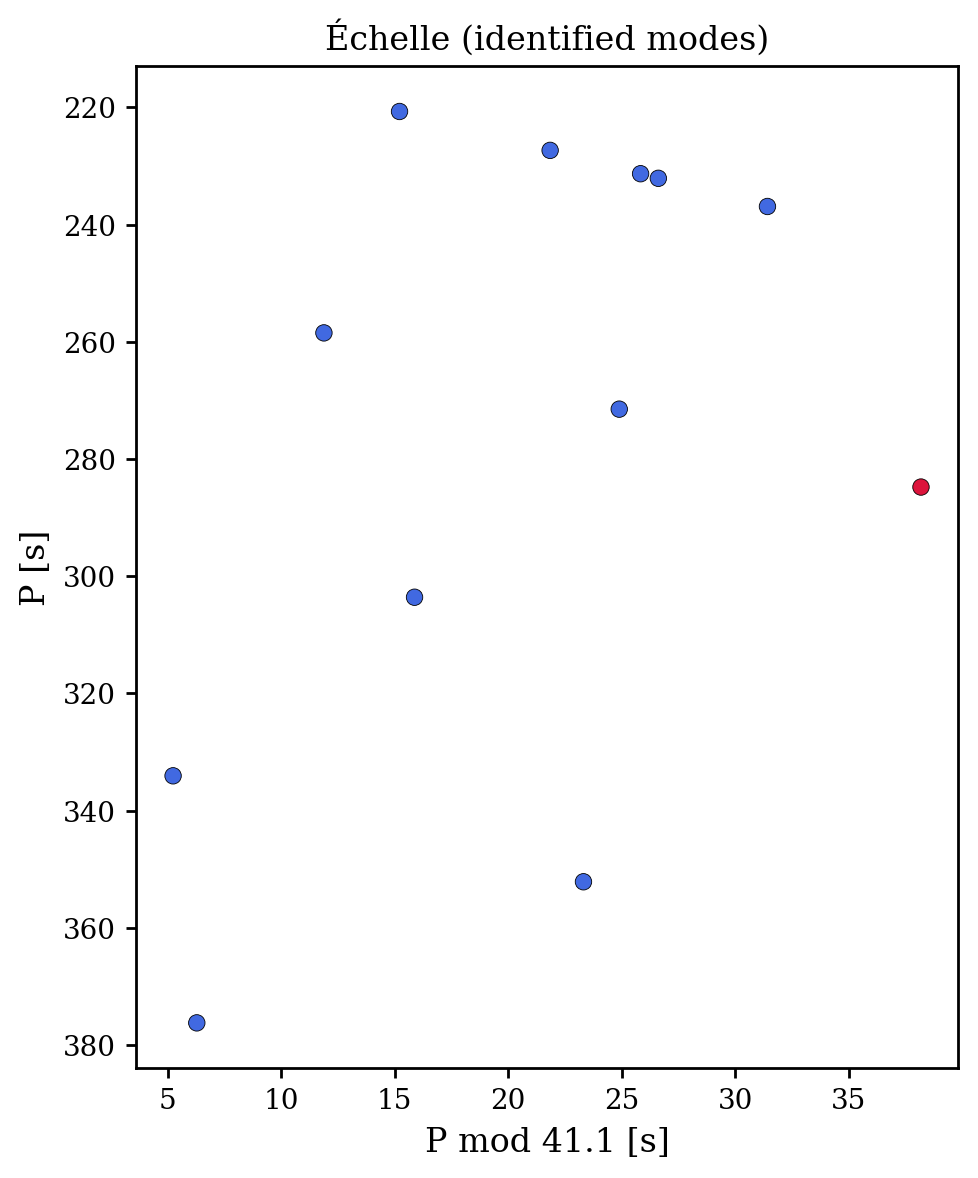

In [41]:
# requires your best ΔΠ1 in seconds: dP1_s
per_modes = 1e6 / modes_plot["nu_uHz"].to_numpy()          # s
x = np.mod(per_modes, dP1_s)
y = per_modes
c = [colors.get(ell_from_label(s), "tab:gray") for s in modes_plot["mode_label"]]

plt.figure(figsize=(5,6))
plt.scatter(x, y, c=c, s=35, edgecolor="k", lw=0.3)
plt.gca().invert_yaxis()
plt.xlabel(f"P mod {dP1_s:.1f} [s]")
plt.ylabel("P [s]")
plt.title("Échelle (identified modes)")
plt.tight_layout()
plt.show()


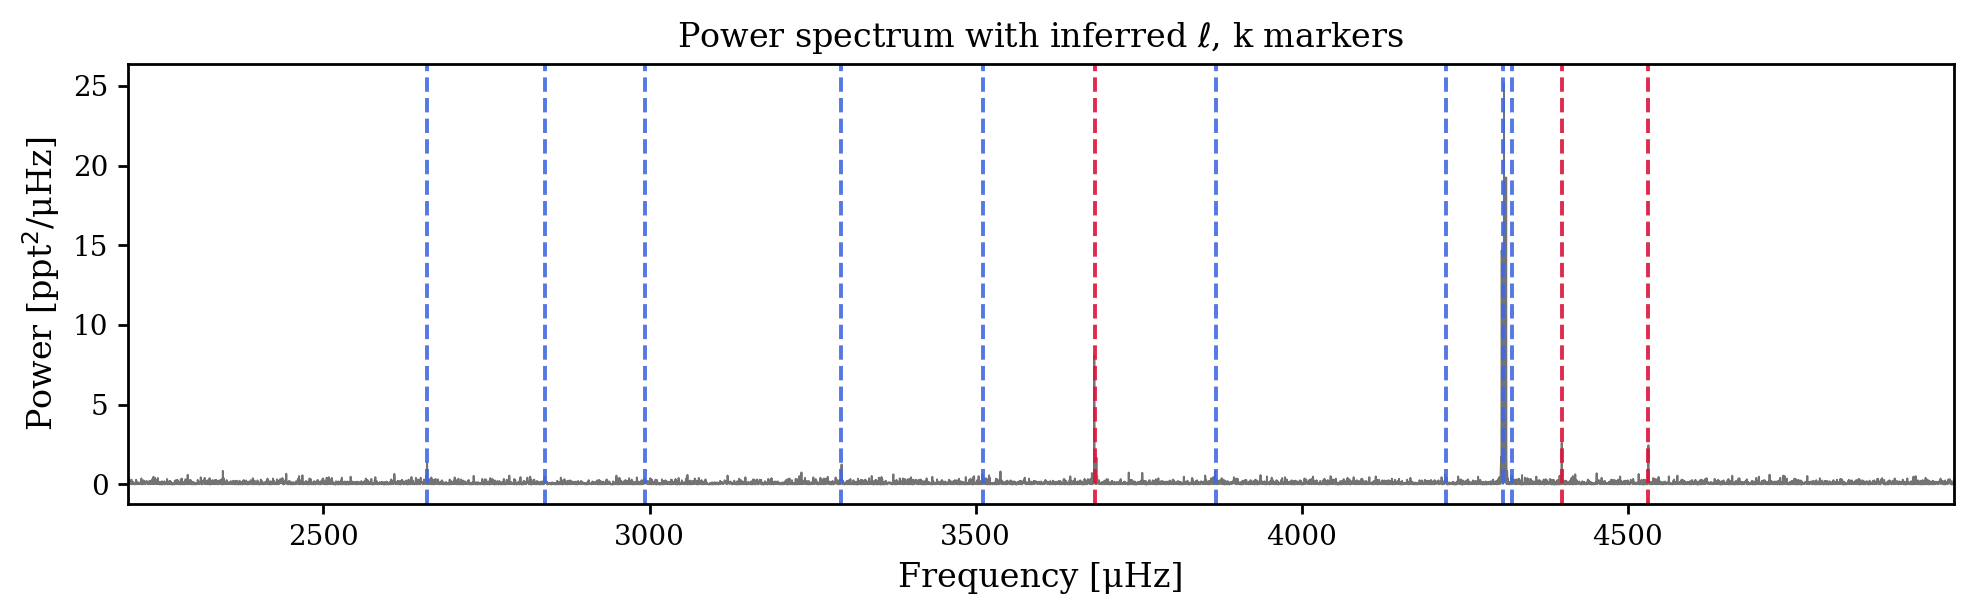

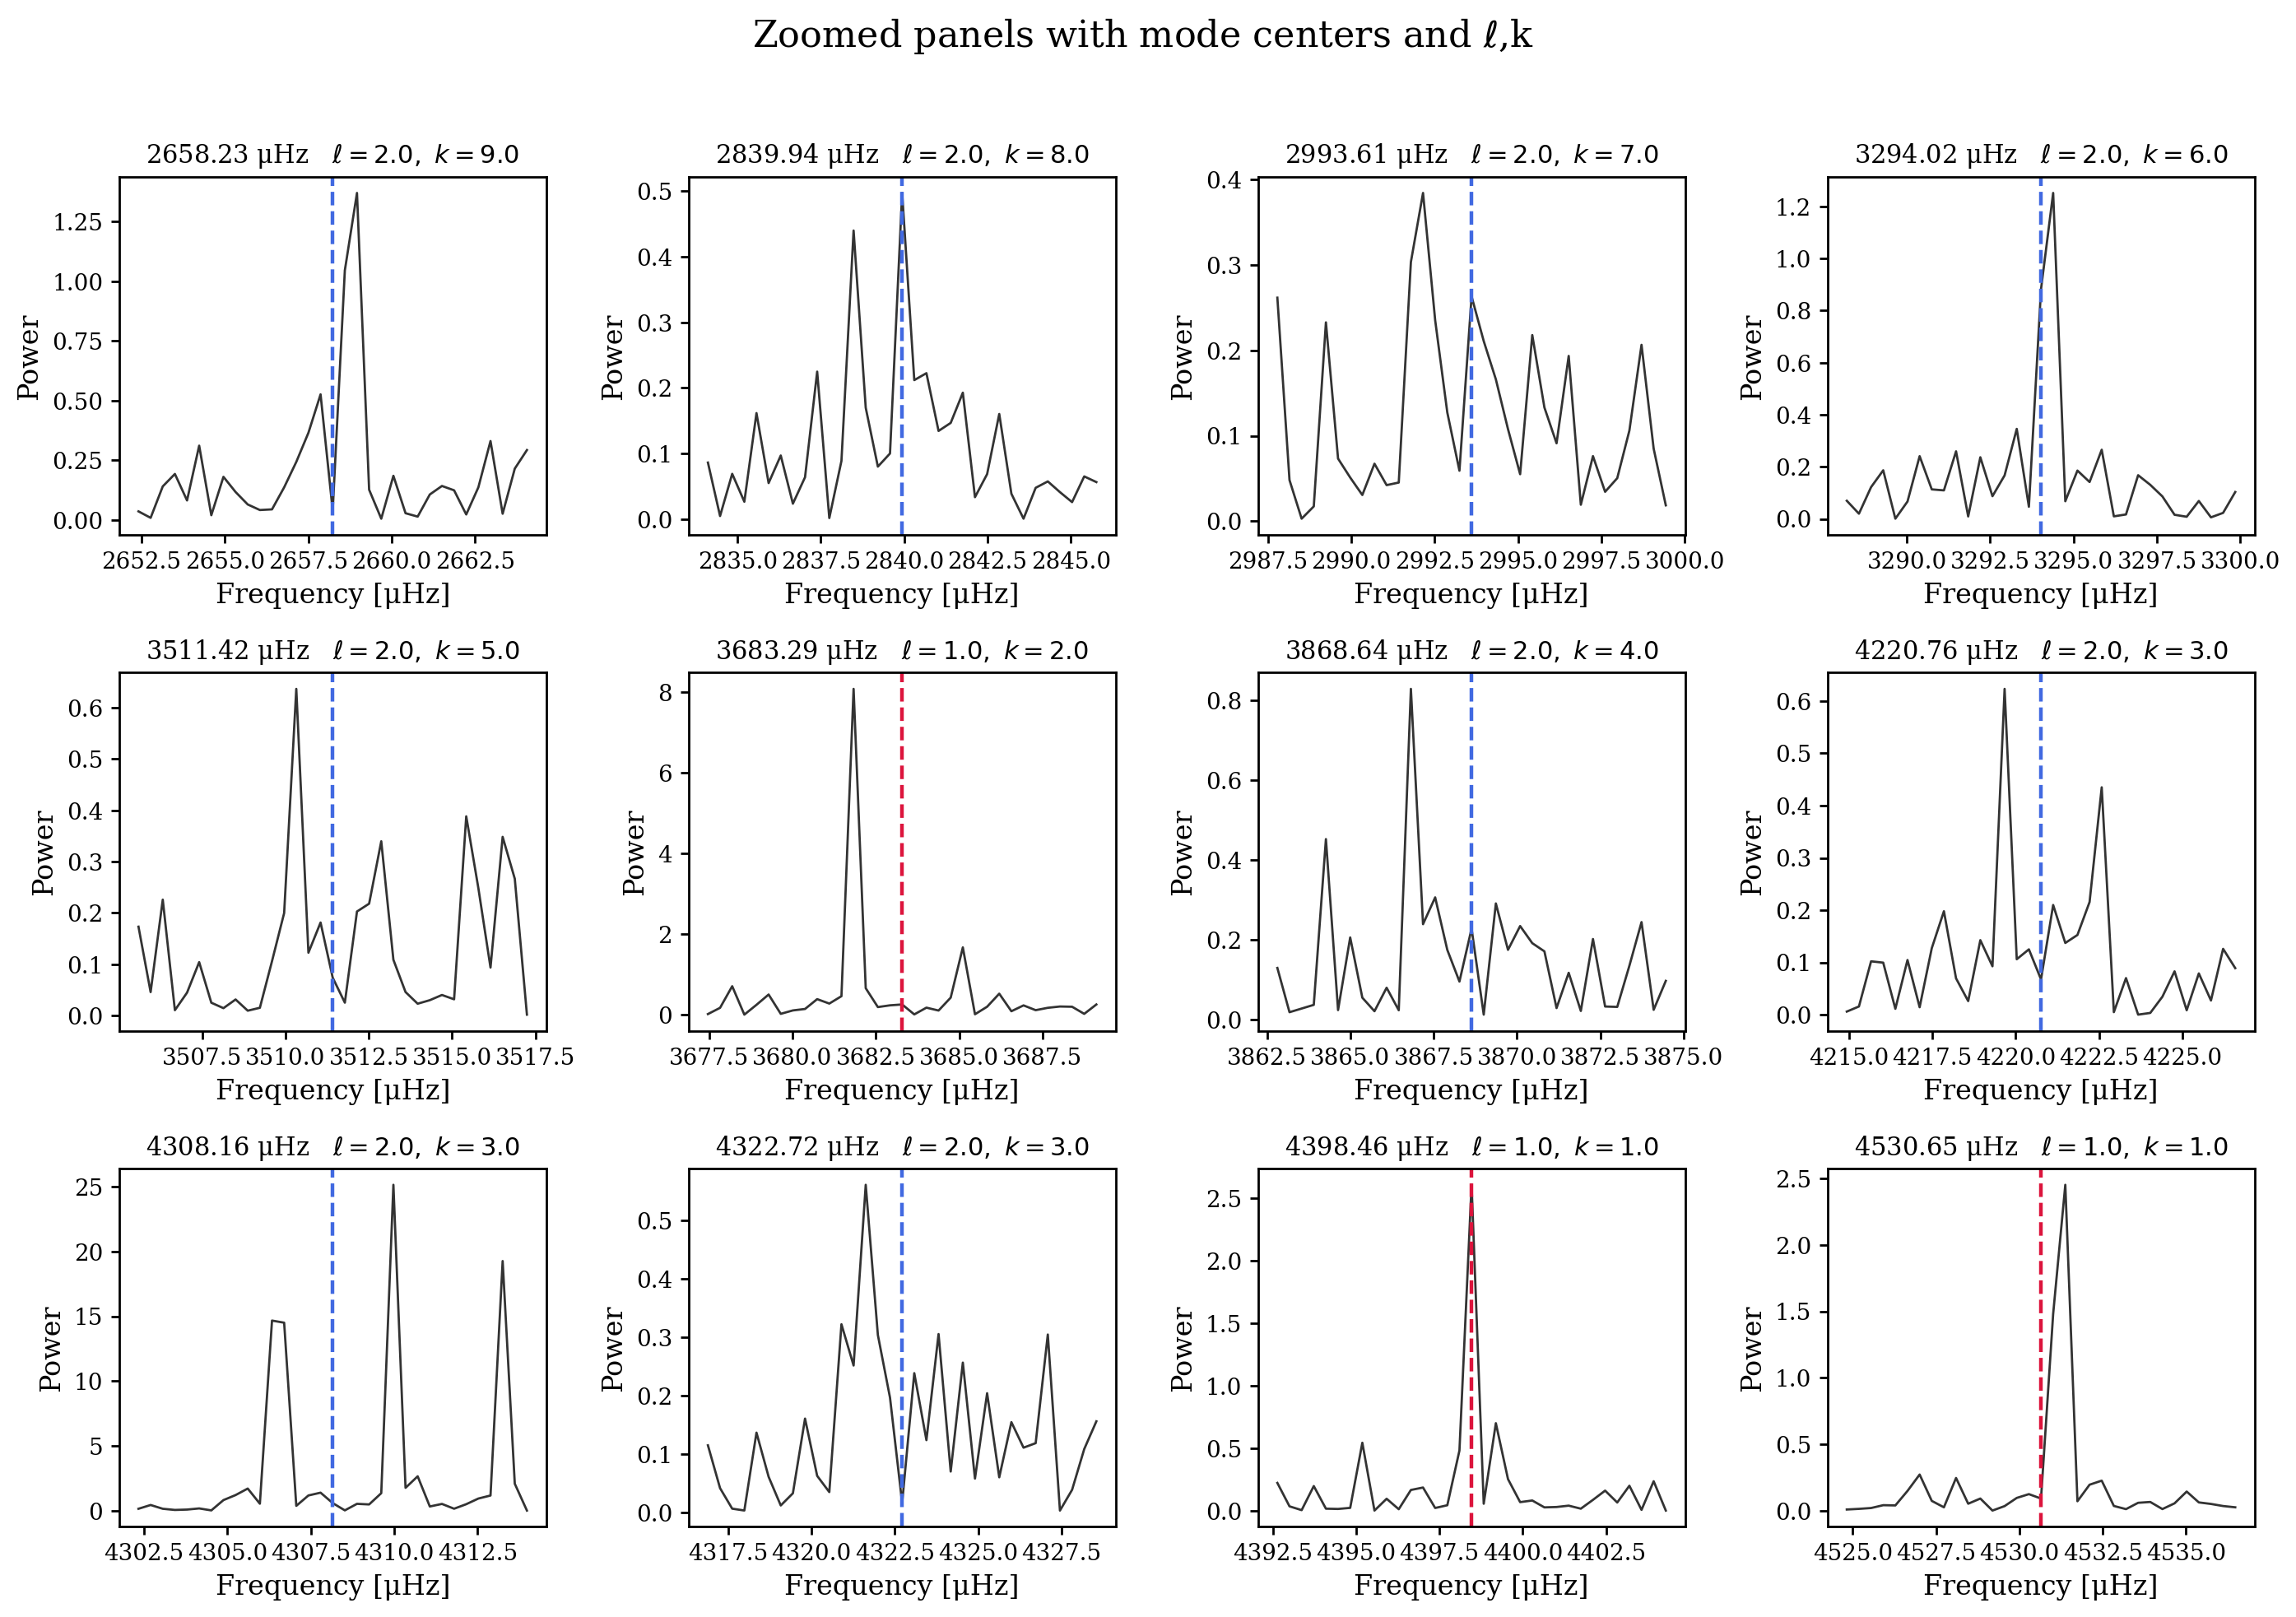

nu_uHz         P_s  ell  k   resid_s
0   2658.232199  376.189860    2  9  0.306891
1   2839.938756  352.120269    2  8 -0.033604
2   2993.606426  334.045248    2  7  5.620470
3   3294.023078  303.580144    2  6 -1.115537
4   3511.415492  284.785438    2  5  3.818853
5   3683.290232  271.496390    1  2  3.043766
6   3868.638203  258.488891    2  4  1.251402
7   4220.762934  236.923991    2  3  3.415598
8   4308.156869  232.117824    2  3 -1.390569
9   4322.722525  231.335690    2  3 -2.172703
10  4398.463936  227.352097    1  1 -0.000527
11  4530.647263  220.719015    1  1 -6.633609

In [42]:
pmin, pmax = 150.0, 420.0    # seconds (adjust if needed)

# If you measured ΔΠ1 from your spacing spectrum, put it here:
dP1_s = 41.1                 # <-- update if your spacing estimate differs
dP2_s = dP1_s/np.sqrt(3.0)

# helpers
def refine_phi(periods_s, dP_s, pmin, pmax, weights=None, ngrid=2001):
    """Refine phase φ in [pmin, pmin+dP) by minimizing weighted wrapped distance."""
    P = np.asarray(periods_s, float)
    m = (P >= pmin) & (P <= pmax)
    P = P[m]; 
    if P.size == 0: 
        return pmin
    W = np.ones_like(P) if weights is None else np.asarray(weights, float)[m]
    phis = np.linspace(pmin, pmin + dP_s, ngrid, endpoint=False)
    scores = np.empty_like(phis)
    for i, phi in enumerate(phis):
        k = np.rint((P - phi)/dP_s)
        dist = P - (phi + k*dP_s)
        scores[i] = np.average(np.abs(dist), weights=W)
    return float(phis[np.argmin(scores)])

def comb_periods(dP_s, phi_s, pmin, pmax, kpad=800):
    phi_s = phi_s + dP_s * np.floor((pmin - phi_s)/dP_s + 1)
    ks = np.arange(-kpad, kpad+1)
    Pcomb = phi_s + ks*dP_s
    kk = ks[(Pcomb >= pmin) & (Pcomb <= pmax)]
    Pc = Pcomb[(Pcomb >= pmin) & (Pcomb <= pmax)]
    return Pc, kk

def nearest_combo(P, Pc):
    """return nearest comb location and residual for each P."""
    P = np.asarray(P, float)
    j = np.searchsorted(Pc, P)
    j0 = np.clip(j-1, 0, len(Pc)-1)
    j1 = np.clip(j,   0, len(Pc)-1)
    Pc_near = np.where(np.abs(P-Pc[j0]) <= np.abs(P-Pc[j1]), Pc[j0], Pc[j1])
    resid = P - Pc_near
    return Pc_near, resid

# ---- data in period space
Per = 1e6/np.asarray(centers_uHz, float)  # s
# fit φ separately for ℓ=1 and ℓ=2
phi1 = refine_phi(Per, dP1_s, pmin, pmax)
phi2 = refine_phi(Per, dP2_s, pmin, pmax)

# build combs in the plotting window
Pc1, k1 = comb_periods(dP1_s, phi1, pmin, pmax)
Pc2, k2 = comb_periods(dP2_s, phi2, pmin, pmax)

# assign each detected peak to whichever comb is closer
P_near1, r1 = nearest_combo(Per, Pc1)
P_near2, r2 = nearest_combo(Per, Pc2)

use_l1 = np.abs(r1) <= np.abs(r2)
ell   = np.where(use_l1, 1, 2)
P_ref = np.where(use_l1, P_near1, P_near2)
resid = np.where(use_l1, r1, r2)

# compute k (radial order index) for each assignment
k_for = np.empty_like(Per, dtype=int)
for i,(Pi, is_l1) in enumerate(zip(Per, use_l1)):
    if is_l1:
        k_for[i] = int(np.rint((P_ref[i]-phi1)/dP1_s))
    else:
        k_for[i] = int(np.rint((P_ref[i]-phi2)/dP2_s))

# tidy table
modes_id = pd.DataFrame({
    "nu_uHz": np.asarray(centers_uHz, float),
    "P_s":    Per,
    "ell":    ell,
    "k":      k_for,
    "resid_s": resid
}).sort_values("nu_uHz").reset_index(drop=True)

# (optional) mask out badly trapped outliers for the labels
mask_ok = np.abs(modes_id["resid_s"]) <= 7.0   # paper used ±7 s
modes_use = modes_id[mask_ok].copy()

# ---- plot like the paper: full band + zooms with labels
def lab(row):
    return fr"$\ell={row['ell']},\ k={row['k']}$"

# FULL band with dashed markers
fig, ax = plt.subplots(figsize=(10, 3.2))
ax.plot(f, P, color="0.45", lw=0.7)
for _, r in modes_use.iterrows():
    c = "crimson" if r["ell"]==1 else "royalblue"
    ax.axvline(r["nu_uHz"], color=c, ls="--", lw=1.4, alpha=0.9)
ax.set_xlim(f.min(), f.max())
ax.set_xlabel("Frequency [μHz]")
ax.set_ylabel("Power [ppt$^2$/μHz]")
ax.set_title("Power spectrum with inferred $\ell$, k markers")
plt.tight_layout()
plt.show()

# Small zoom panels (±6 μHz around each)
cols = 4
rows = int(np.ceil(len(modes_use)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(14, 3.2*rows), sharey=False)
axes = np.atleast_1d(axes).ravel()
for ax, (_, r) in zip(axes, modes_use.iterrows()):
    nu0 = r["nu_uHz"]; c = "crimson" if r["ell"]==1 else "royalblue"
    w = 6.0
    m = (f >= nu0-w) & (f <= nu0+w)
    ax.plot(f[m], P[m], color="0.2", lw=1.0)
    ax.axvline(nu0, color=c, ls="--", lw=1.6)
    ax.set_title(f"{nu0:.2f} μHz   {lab(r)}", fontsize=11)
    ax.set_xlabel("Frequency [μHz]"); ax.set_ylabel("Power")
for ax in axes[len(modes_use):]:
    ax.axis("off")
plt.suptitle("Zoomed panels with mode centers and $\ell$,k", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

display(modes_id)

Found 535 combinations at tol=0.50 µHz (Rayleigh=0.36 µHz). Parents used: 80, wide-band peaks: 671.


kind   i   j    k           fi           fj           fk        Ai  \
0    sum  13  36  493  1184.187823  3214.276112  4398.463936  0.289851   
1    sum   0  28  297   158.037366  2500.194832  2658.232199  0.296716   
2   diff   9  28  178   900.885816  2500.194832  1599.309016  0.299873   
3   diff  17  23   53  1533.399423  2059.219601   525.820177  0.298943   
4    sum   5  17  228   525.820177  1533.399423  2059.219601  0.316095   
5    sum   8  25  333   676.210574  2317.031710  2993.242284  0.310406   
6    sum  16  38  527  1444.913064  3294.751361  4739.664425  0.288552   
7   diff  17  27   97  1533.399423  2434.285240   900.885816  0.298943   
8   diff  20  28   97  1599.309016  2500.194832   900.885816  0.316298   
9   diff   9  27  173   900.885816  2434.285240  1533.399423  0.299873   
10  diff   5  23  173   525.820177  2059.219601  1533.399423  0.316095   
11   sum   9  17  272   900.885816  1533.399423  2434.285240  0.299873   
12   sum   7  34  397   565.875731  2954.643296  3520.519027  0.300882   
13   sum   9  20  279   900.885816  1599.309016  2500.194832  0.299873   
14  diff   7  41  328   565.875731  3520.519027  2954.643296  0.300882   
15   sum   8  52  542   676.210574  4213.480106  4889.690680  0.310406   
16  diff   8  65  469   676.210574  4889.690680  4213.480106  0.310406   
17  diff   8  35  257   676.210574  2993.242284  2317.031710  0.310406   
18   sum   2  38  392   198.092920  3294.751361  3492.844281  0.307292   
19  diff  38  75  252  3294.751361  5577.189638  2282.438277  0.413648   
20   sum   0  24  261   158.037366  2185.212524  2343.249890  0.296716   
21   sum  21  37  556  1743.873151  3272.174594  5016.047745  0.301362   
22  diff  20  67  383  1599.309016  5007.308351  3407.999335  0.316298   
23   sum  23  31  525  2059.219601  2658.232199  4717.451799  0.308655   
24  diff   9  61  393   900.885816  4398.463936  3497.578119  0.299873   

          Aj        Ak   df        Rc  |df|_uHz  
0   0.287929  0.483475  0.0  2.896568       0.0  
1   0.297712  0.454666  0.0  2.573501       0.0  
2   0.297712  0.316298  0.0  1.771460       0.0  
3   0.308655  0.316095  0.0  1.712874       0.0  
4   0.298943  0.308655  0.0  1.633197       0.0  
5   0.288457  0.306513  0.0  1.711618       0.0  
6   0.413648  0.305131  0.0  1.278204       0.0  
7   0.298865  0.299873  0.0  1.678205       0.0  
8   0.297712  0.299873  0.0  1.592264       0.0  
9   0.298865  0.298943  0.0  1.667809       0.0  
10  0.308655  0.298943  0.0  1.532028       0.0  
11  0.298943  0.298865  0.0  1.666935       0.0  
12  0.295948  0.297954  0.0  1.673050       0.0  
13  0.316298  0.297712  0.0  1.569400       0.0  
14  0.297954  0.295948  0.0  1.650593       0.0  
15  0.289204  0.289607  0.0  1.613041       0.0  
16  0.289607  0.289204  0.0  1.608550       0.0  
17  0.306513  0.288457  0.0  1.515908       0.0  
18  0.413648  0.283723  0.0  1.116049       0.0  
19  0.297952  0.282183  0.0  1.144784       0.0  
20  0.299960  0.281513  0.0  1.581481       0.0  
21  0.305402  0.279655  0.0  1.519260       0.0  
22  0.289326  0.279529  0.0  1.527266       0.0  
23  0.454666  0.278883  0.0  0.993634       0.0  
24  0.483475  0.278756  0.0  0.961354       0.0

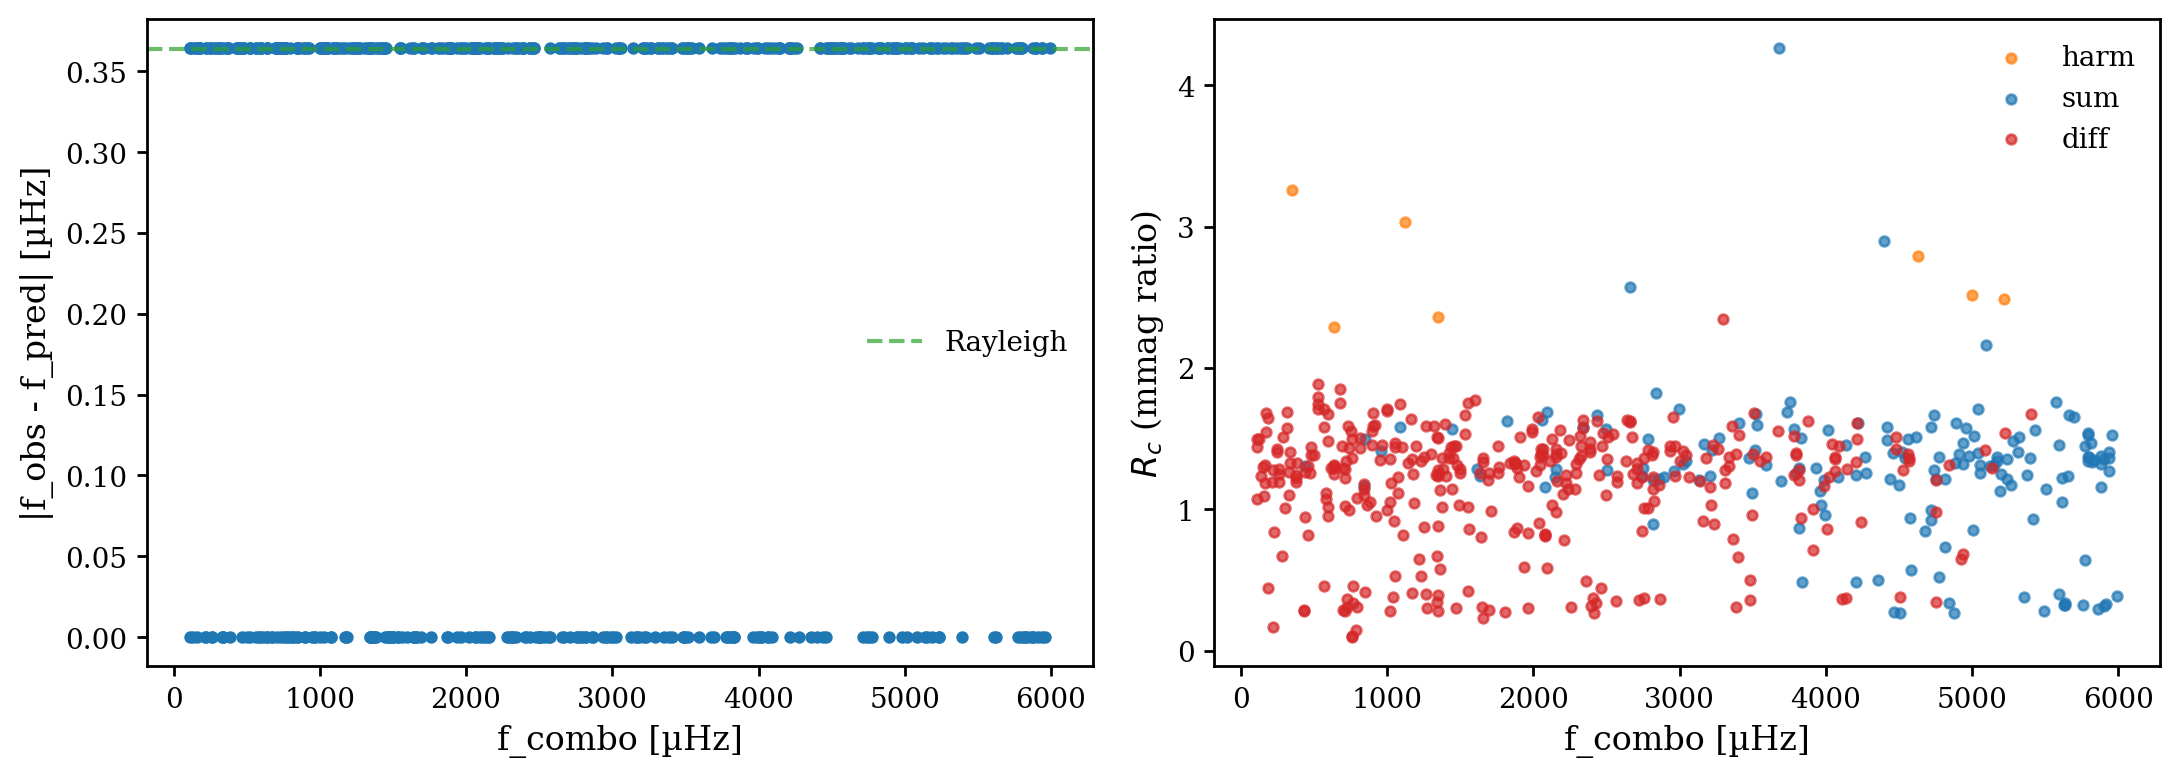

In [45]:
# 0) Pull a wide band from your periodogram (tweak limits if needed)
f_full = pg.frequency.to(u.uHz).value.astype(float)
P_full = pg.power.value.astype(float)
wide = (f_full >= 100.0) & (f_full <= 6000.0)   # wider than your parent band
f_w   = f_full[wide]
P_w   = P_full[wide]
df    = np.median(np.diff(f_w))

# 1) Smooth a little + detect MANY peaks across wide band
def smooth_boxcar(y, width_uHz):
    w = max(3, int(round(width_uHz/df)))
    return np.convolve(y, np.ones(w)/w, mode="same")

P_ws  = smooth_boxcar(P_w, 3.0)                              # ~3 μHz boxcar
prom0 = 0.20*np.percentile(P_ws, 99.0)                       # be inclusive
pk_all, props = find_peaks(P_ws, prominence=prom0, distance=max(1,int(round(0.6/df))))
f_all = f_w[pk_all]
P_all = P_ws[pk_all]

# 2) Amplitude proxy for ranking (relative is fine for Rc)
A_rel = np.sqrt(np.maximum(P_all, 0.0) * df)                 # ~ppt (rel.)
A_mmag = 1.086*A_rel                                         # mmag approx.

# 3) Choose parents from the stronger wide-band peaks
Nparents = min(80, len(f_all))
parents_ix = np.argsort(A_mmag)[-Nparents:]
parents_ix.sort()
f_par   = f_all[parents_ix]
A_par   = A_mmag[parents_ix]

# 4) Adaptive tolerance & band edges for reporting
T_days = lc.time.jd.max() - lc.time.jd.min()
rayleigh = 1e6/(T_days*86400.0)
fmin, fmax = f_all.min(), f_all.max()

def find_combos_match_to_all(f_par, A_par, f_all, tol):
    rows, missed = [], []
    # map: for quick nearest-peak search
    for i in range(len(f_par)):
        # harmonic 2*fi
        f_pred = 2.0*f_par[i]
        if (f_pred < fmin) or (f_pred > fmax):
            missed.append(("harm", i, i, f_pred))
        else:
            j = np.argmin(np.abs(f_all - f_pred))
            if abs(f_all[j]-f_pred) <= tol:
                rows.append(dict(kind="harm", i=i, j=i, k=j,
                                 fi=f_par[i], fj=f_par[i], fk=f_all[j],
                                 Ai=A_par[i], Aj=A_par[i],
                                 Ak=A_mmag[np.where(f_all==f_all[j])[0][0]],
                                 df=f_all[j]-f_pred))
    # sums/diffs
    for i, j in combinations(range(len(f_par)), 2):
        # sum
        f_pred = f_par[i] + f_par[j]
        if (f_pred < fmin) or (f_pred > fmax):
            missed.append(("sum", i, j, f_pred))
        else:
            k = np.argmin(np.abs(f_all - f_pred))
            if abs(f_all[k]-f_pred) <= tol:
                rows.append(dict(kind="sum", i=i, j=j, k=k,
                                 fi=f_par[i], fj=f_par[j], fk=f_all[k],
                                 Ai=A_par[i], Aj=A_par[j],
                                 Ak=A_mmag[np.where(f_all==f_all[k])[0][0]],
                                 df=f_all[k]-f_pred))
        # diff (positive)
        f_pred = abs(f_par[i] - f_par[j])
        if (f_pred < fmin) or (f_pred > fmax):
            missed.append(("diff", i, j, f_pred))
        else:
            k = np.argmin(np.abs(f_all - f_pred))
            if abs(f_all[k]-f_pred) <= tol:
                rows.append(dict(kind="diff", i=i, j=j, k=k,
                                 fi=f_par[i], fj=f_par[j], fk=f_all[k],
                                 Ai=A_par[i], Aj=A_par[j],
                                 Ak=A_mmag[np.where(f_all==f_all[k])[0][0]],
                                 df=f_all[k]-f_pred))
    return pd.DataFrame(rows), pd.DataFrame(missed, columns=["kind","i","j","f_pred_uHz"])

# 5) Sweep tolerances until we get hits
tol_grid = [max(0.5, 0.6*rayleigh), 0.8, 1.0, 1.5, 2.0]
found, tol_used, missed_all = None, None, None
for tol in tol_grid:
    comb, missed = find_combos_match_to_all(f_par, A_par, f_all, tol)
    if not comb.empty:
        found, tol_used, missed_all = comb.sort_values("kind"), tol, missed
        break
if found is None:
    _, missed_all = find_combos_match_to_all(f_par, A_par, f_all, tol_grid[-1])
    print(f"No combinations found up to tol={tol_grid[-1]:.2f} µHz.\n"
          f"Wide-band peaks detected: {len(f_all)} (band [{fmin:.1f},{fmax:.1f}] µHz).\n"
          "Try lowering the prominence or widening the band further.")
else:
    # Yeates Rc
    nij = np.where(found["kind"].eq("harm"), 1.0, 2.0)
    found["Rc"] = found["Ak"] / (nij * found["Ai"] * found["Aj"] + 1e-12)
    found["|df|_uHz"] = np.abs(found["df"])
    found = found.sort_values(["|df|_uHz","Ak"], ascending=[True, False]).reset_index(drop=True)
    print(f"Found {len(found)} combinations at tol={tol_used:.2f} µHz "
          f"(Rayleigh={rayleigh:.2f} µHz). Parents used: {len(f_par)}, wide-band peaks: {len(f_all)}.")
    display(found.head(25))

    # quick plots
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,2, figsize=(11,4))
    ax[0].scatter(found["fk"], found["|df|_uHz"], s=12)
    ax[0].axhline(rayleigh, ls="--", color="tab:green", alpha=0.7, label="Rayleigh")
    ax[0].set_xlabel("f_combo [µHz]"); ax[0].set_ylabel("|f_obs - f_pred| [µHz]"); ax[0].legend(frameon=False)
    for kind, col in [("harm","tab:orange"),("sum","tab:blue"),("diff","tab:red")]:
        m = found["kind"].eq(kind)
        if m.any():
            ax[1].scatter(found.loc[m,"fk"], found.loc[m,"Rc"], s=12, label=kind, alpha=0.7, color=col)
    ax[1].set_xlabel("f_combo [µHz]"); ax[1].set_ylabel(r"$R_c$ (mmag ratio)"); ax[1].legend(frameon=False)
    plt.tight_layout(); plt.show()

In [48]:
rayleigh

np.float64(0.36402828035940177)

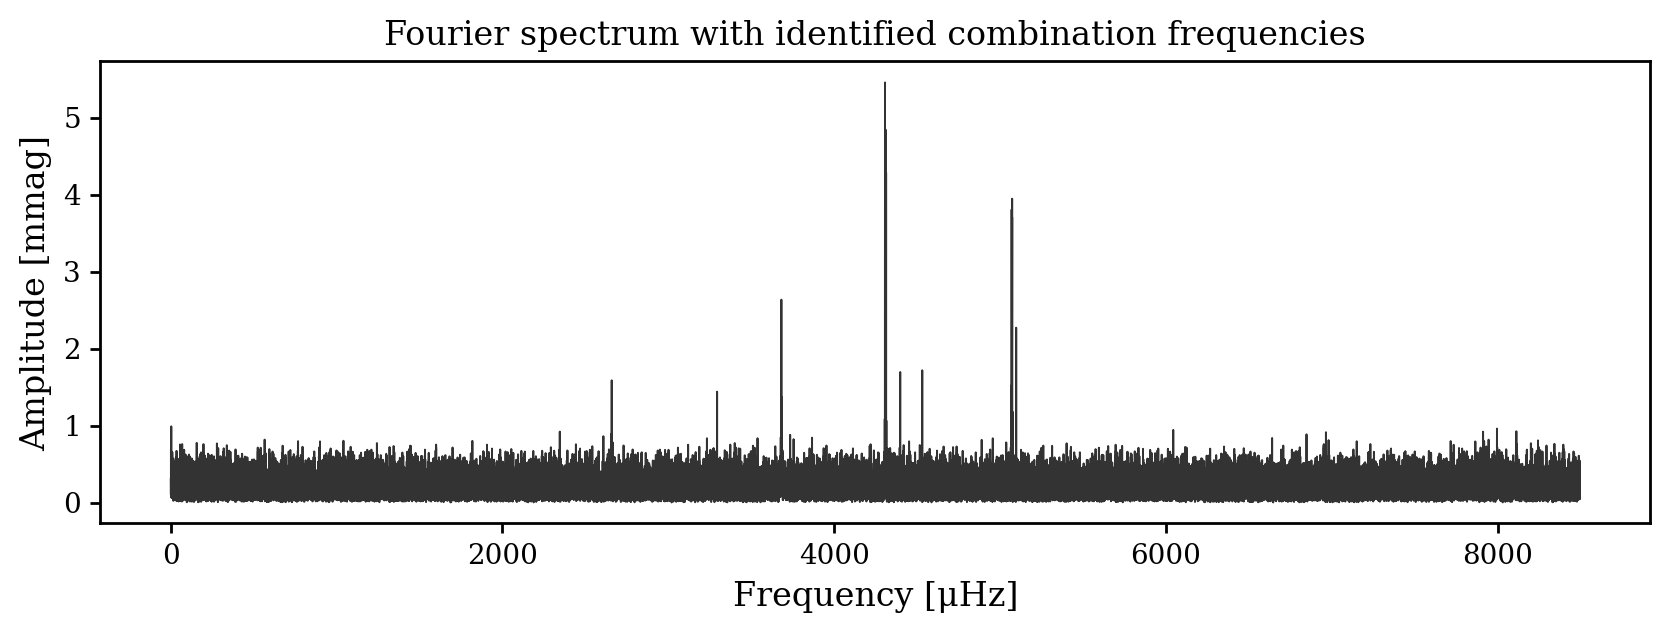

In [50]:
pgA = lc.normalize(unit='ppm').to_periodogram(normalization='amplitude')
# amplitudes are in ppm; convert to mmag:
# small-signal: Δm [mag] ≈ -1.0857 * ΔF/F, so 1 ppm = 1e-6 in flux ≈ 1.0857e-6 mag = 0.0010857 mmag
amp_mmag = pgA.power.value * 0.0010857   # ppm → mmag
f_uHz     = pgA.frequency.to(u.uHz).value

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(f_uHz, amp_mmag, color='0.2', lw=0.7)
ax.set(xlabel='Frequency [μHz]', ylabel='Amplitude [mmag]',
       title='Fourier spectrum with identified combination frequencies')

####################################
def normalize_combos(combos):
    # 1) Already a DataFrame
    if isinstance(combos, pd.DataFrame):
        df = combos.copy()
    # 2) Dict of arrays
    elif isinstance(combos, dict):
        df = pd.DataFrame(combos)
    # 3) List of dicts
    elif isinstance(combos, (list, tuple)) and len(combos) and isinstance(combos[0], dict):
        df = pd.DataFrame(combos)
    else:
        arr = np.asarray(combos, dtype=object)
        # 4) Structured/rec array
        if getattr(arr, "dtype", None) is not None and arr.dtype.names:
            df = pd.DataFrame({k: arr[k] for k in arr.dtype.names})
        else:
            # 5) Plain list/array of tuples
            arr = np.atleast_2d(arr)
            if arr.shape[1] >= 5:
                df = pd.DataFrame(arr[:, :5],
                                  columns=["f_obs_uHz","f_pred_uHz","delta_f_uHz","A_combo_mmag","kind"])
            elif arr.shape[1] == 4:
                f_obs, f_pred, delta_f, kind = arr.T
                df = pd.DataFrame(dict(f_obs_uHz=f_obs, f_pred_uHz=f_pred,
                                       delta_f_uHz=delta_f, A_combo_mmag=np.nan, kind=kind))
            elif arr.shape[1] == 3:
                f_obs, f_pred, kind = arr.T
                f_obs = np.asarray(f_obs, float); f_pred = np.asarray(f_pred, float)
                df = pd.DataFrame(dict(f_obs_uHz=f_obs, f_pred_uHz=f_pred,
                                       delta_f_uHz=np.abs(f_obs - f_pred),
                                       A_combo_mmag=np.nan, kind=kind))
            else:
                raise TypeError("`combos` must be a DataFrame/dict, a structured array, "
                                "or an (N,3–5) array/list of tuples.")

    # Harmonize column names if different
    rename_map = {
        "f_obs": "f_obs_uHz", "f_pred": "f_pred_uHz", "delta_f": "delta_f_uHz",
        "A_combo": "A_combo_mmag", "amp_mmag": "A_combo_mmag", "amplitude_mmag": "A_combo_mmag",
        "type": "kind", "class": "kind"
    }
    for k, v in rename_map.items():
        if k in df.columns and v not in df.columns:
            df[v] = df[k]

    # Ensure required columns
    for col in ["f_obs_uHz","f_pred_uHz","delta_f_uHz","kind"]:
        if col not in df.columns:
            raise TypeError(f"Missing required column '{col}' after normalization.")

    if "A_combo_mmag" not in df.columns:
        df["A_combo_mmag"] = np.nan

    # Cast to numeric where appropriate
    for c in ["f_obs_uHz","f_pred_uHz","delta_f_uHz","A_combo_mmag"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df["kind"] = df["kind"].astype(str)
    return df


combos_df = normalize_combos(combos).reset_index(drop=True)
# keep matches within Rayleigh resolution
combos_df = combos_df[combos_df["delta_f_uHz"] <= rayleigh_uHz]
####################################


for row in combos_df.itertuples():
    if row.delta_f_uHz <= rayleigh_uHz:     # good matches only
        # arrow/marker
        ax.vlines(row.f_obs_uHz, 0, row.A_combo_mmag, color=('C0' if row.kind=='sum' else 'C3'),
                  lw=1.2, alpha=0.9)
        # text label like "F1+F3" or "2F2"
        ax.text(row.f_obs_uHz, row.A_combo_mmag*1.05, row.label,
                color=('C0' if row.kind=='sum' else 'C3'),
                fontsize=8, rotation=90, ha='center', va='bottom')


Baseline T ≈ 31.79 d  |  Rayleigh ≈ 0.364 μHz  |  tol = 1.00 μHz
Parents used: 50  |  All peaks available: 5622  |  Combos kept: 1727


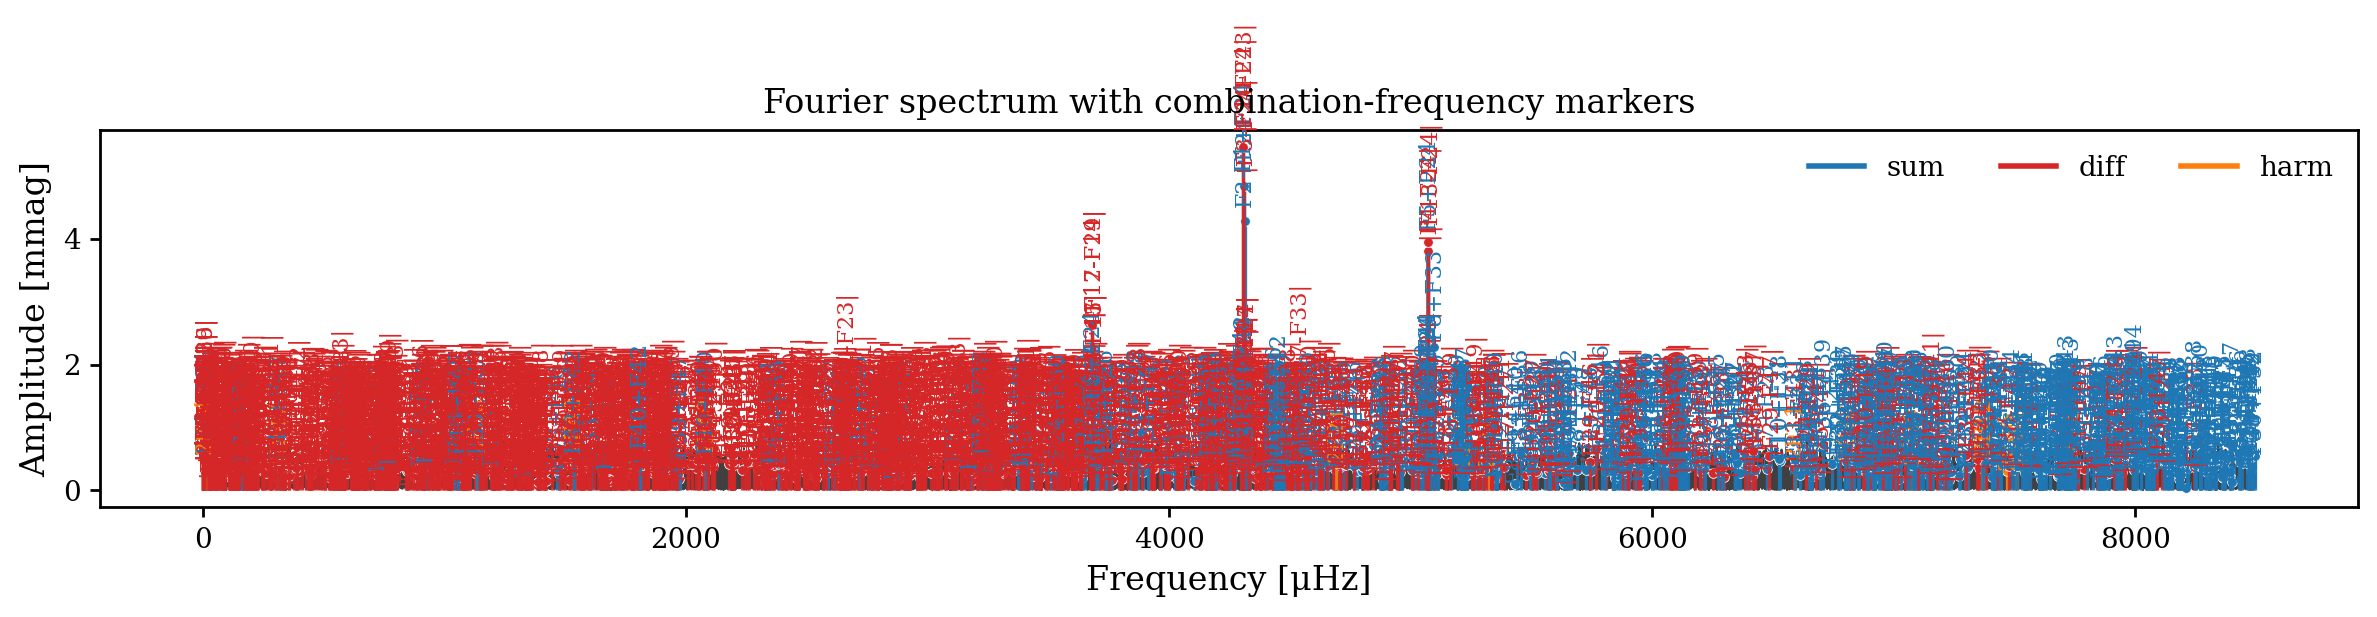

In [53]:


# ----------------- 1) Rayleigh resolution -----------------
T_days = float(lc.time.jd.max() - lc.time.jd.min())
rayleigh_uHz = 1e6 / (T_days * 86400.0)

# ----------------- 2) Observed peaks (parents + all peaks) -----------------
# Find peaks on amplitude spectrum; use prominence to avoid noise
df = np.median(np.diff(f_uHz))
min_dist_bins = max(1, int(round(1.0/df)))   # ~1 μHz separation
pk, _ = find_peaks(amp_mmag, distance=min_dist_bins)
if pk.size == 0:
    raise RuntimeError("No peaks found; relax 'distance' or check amp_mmag.")

prom = peak_prominences(amp_mmag, pk)[0]
order = np.argsort(prom)[::-1]

# Parents: top N by prominence
Nparents = min(50, pk.size)
parents_idx = pk[order[:Nparents]]
f_par  = f_uHz[parents_idx]
A_par  = amp_mmag[parents_idx]

# All peaks for matching (denser list helps matching combos)
all_idx  = pk
f_all    = f_uHz[all_idx]
A_all    = amp_mmag[all_idx]

# ----------------- 3) Build predicted combinations -----------------
rows = []
fmin, fmax = f_uHz.min(), f_uHz.max()
tol_uHz = max(1.5*rayleigh_uHz, 1.0)   # try ≤1.5×Rayleigh, but at least 1 μHz

# sums & diffs
for i in range(len(f_par)):
    for j in range(i, len(f_par)):
        fi, fj = f_par[i], f_par[j]
        Ai, Aj = A_par[i], A_par[j]

        # sum
        f_pred = fi + fj
        if fmin <= f_pred <= fmax:
            k = int(np.argmin(np.abs(f_all - f_pred)))
            f_obs = float(f_all[k]); d = abs(f_obs - f_pred)
            if d <= tol_uHz:
                rows.append(dict(kind="sum", i=i, j=j, f_pred_uHz=f_pred,
                                 f_obs_uHz=f_obs, delta_f_uHz=d,
                                 A_combo_mmag=float(A_all[k]), Ai_mmag=Ai, Aj_mmag=Aj,
                                 label=f"F{i+1}+F{j+1}"))

        # diff
        f_pred = abs(fi - fj)
        if fmin <= f_pred <= fmax:
            k = int(np.argmin(np.abs(f_all - f_pred)))
            f_obs = float(f_all[k]); d = abs(f_obs - f_pred)
            if d <= tol_uHz:
                rows.append(dict(kind="diff", i=i, j=j, f_pred_uHz=f_pred,
                                 f_obs_uHz=f_obs, delta_f_uHz=d,
                                 A_combo_mmag=float(A_all[k]), Ai_mmag=Ai, Aj_mmag=Aj,
                                 label=f"|F{i+1}-F{j+1}|"))

# simple harmonics (2f)
for i in range(len(f_par)):
    fi, Ai = f_par[i], A_par[i]
    f_pred = 2.0*fi
    if fmin <= f_pred <= fmax:
        k = int(np.argmin(np.abs(f_all - f_pred)))
        f_obs = float(f_all[k]); d = abs(f_obs - f_pred)
        if d <= tol_uHz:
            rows.append(dict(kind="harm", i=i, j=i, f_pred_uHz=f_pred,
                             f_obs_uHz=f_obs, delta_f_uHz=d,
                             A_combo_mmag=float(A_all[k]), Ai_mmag=Ai, Aj_mmag=Ai,
                             label=f"2F{i+1}"))

combos_df = pd.DataFrame(rows)
print(f"Baseline T ≈ {T_days:.2f} d  |  Rayleigh ≈ {rayleigh_uHz:.3f} μHz  |  tol = {tol_uHz:.2f} μHz")
print(f"Parents used: {len(f_par)}  |  All peaks available: {len(f_all)}  |  Combos kept: {len(combos_df)}")

if combos_df.empty:
    print("No combination frequencies to plot. Consider increasing Nparents or tol_uHz.")
else:
    # optional strength metric like Yeates
    combos_df["Rc"] = combos_df["A_combo_mmag"] / (combos_df["Ai_mmag"] * combos_df["Aj_mmag"]).replace(0, np.nan)

    # ----------------- 4) Overlay on spectrum -----------------
    import matplotlib.pyplot as plt
    kind_color = {'sum':'C0', 'diff':'C3', 'harm':'C1'}

    # evaluate y at each f_obs (use amplitude array directly)
    def y_at(freq_uHz):
        k = int(np.argmin(np.abs(f_uHz - freq_uHz)))
        return amp_mmag[k], f_uHz[k]

    vals_bins = [y_at(fr) for fr in combos_df["f_obs_uHz"].values]
    combos_df["y_here"] = [vb[0] for vb in vals_bins]
    combos_df["f_bin"]  = [vb[1] for vb in vals_bins]
    combos_df["A_plot"] = combos_df["A_combo_mmag"].fillna(combos_df["y_here"])
    combos_df = combos_df.sort_values("A_plot")  # draw weakest first

    fig, ax = plt.subplots(figsize=(12, 3.2))
    ax.plot(f_uHz, amp_mmag, color='0.25', lw=0.7, label='Amplitude FT')

    for _, r in combos_df.iterrows():
        c = kind_color.get(r["kind"], 'k')
        ax.vlines(r["f_bin"], 0, r["A_plot"], color=c, lw=1.2, alpha=0.9)
        ax.plot([r["f_bin"]], [r["A_plot"]], 'o', ms=3.5, color=c, mec='white', mew=0.3)
        # tiny label just above the marker
        ax.text(r["f_bin"], r["A_plot"]*1.05, r["label"], color=c, fontsize=8,
                rotation=90, ha='center', va='bottom')

    from matplotlib.lines import Line2D
    kinds_present = combos_df["kind"].unique()
    handles = [Line2D([0],[0], color=kind_color[k], lw=2, label=k) for k in ['sum','diff','harm'] if k in kinds_present]
    if handles: ax.legend(handles=handles, frameon=False, ncol=len(handles))

    ax.set(xlabel='Frequency [μHz]', ylabel='Amplitude [mmag]',
           title='Fourier spectrum with combination-frequency markers')
    plt.tight_layout(); plt.show()


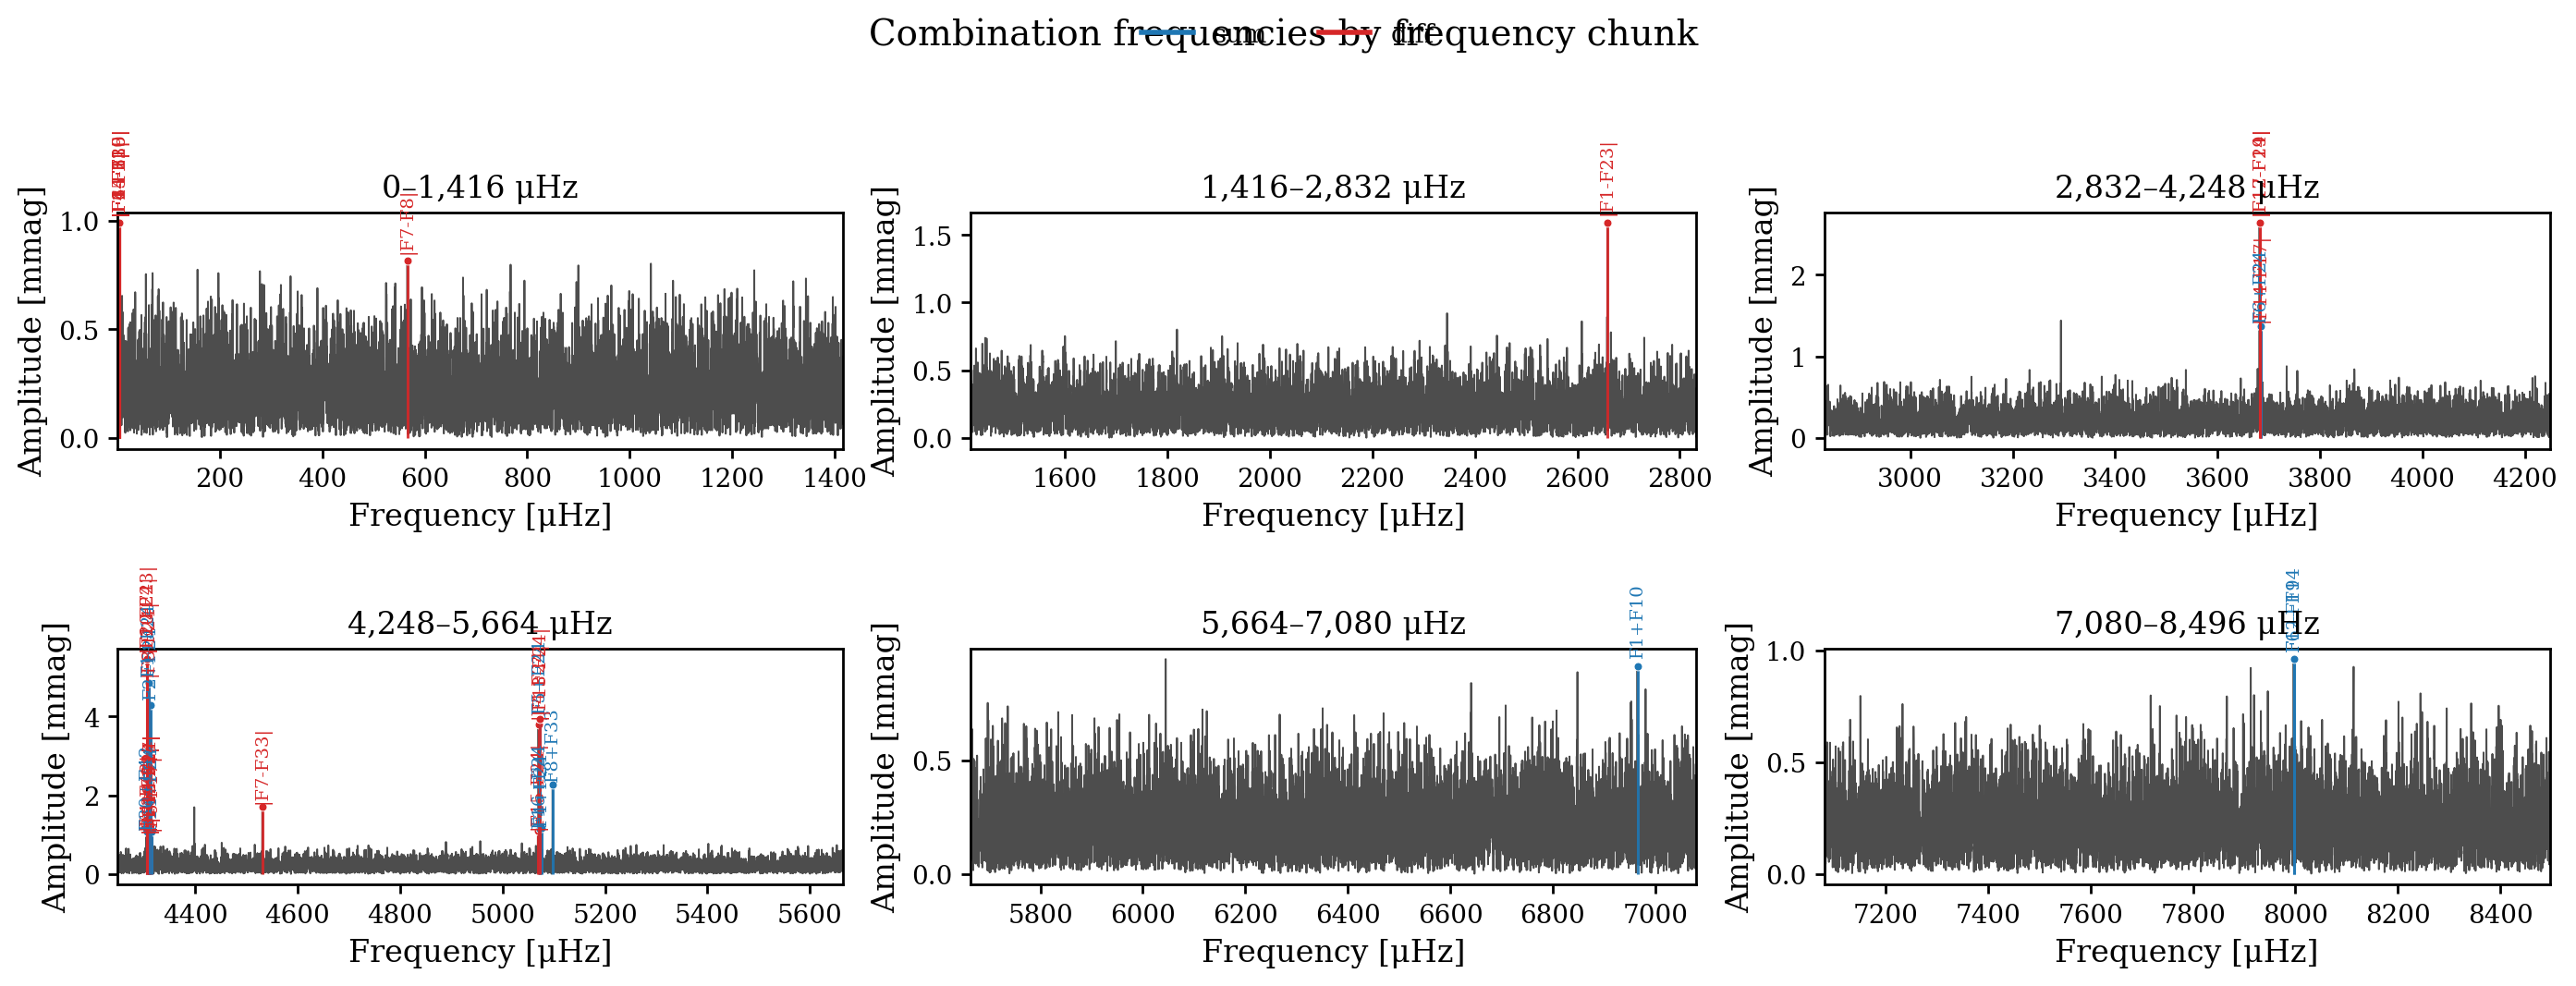

In [57]:


# ---- CONFIG ----
# Option A: fixed windows you choose
# windows = [(800, 1200), (800, 1600), (1600, 2600), (2600, 3600), (3600, 5200), (5200, 7000), (7000, 9000)]

# Option B: auto-split full range into K equal-width chunks
K = 6
fmin, fmax = float(f_uHz.min()), float(f_uHz.max())
edges = np.linspace(fmin, fmax, K+1)
windows = [(edges[i], edges[i+1]) for i in range(K)]

# Optional: light de-clutter (only annotate combos above this local SNR)
def local_snr(f0, width=150.0):  # μHz half-width window
    m = (f_uHz >= f0-width) & (f_uHz <= f0+width)
    if not np.any(m): 
        return np.nan
    med = np.median(amp_mmag[m])
    mad = 1.4826*np.median(np.abs(amp_mmag[m] - med))
    return (amp_mmag[np.argmin(np.abs(f_uHz - f0))] - med) / (mad + 1e-12)

SNR_MIN = 3.0   # increase to be stricter

# Build colors once
kind_color = {'sum':'C0', 'diff':'C3', 'harm':'C1'}

# ===== keep only prominent combinations =====
def order_from_label(s: str) -> int:
    # counts how many parents, e.g. "F12+F7" -> 2, "F3+F4+F21" -> 3
    return 0 if not isinstance(s, str) else s.count("F")

def local_snr(f0, width=150.0):
    m = (f_uHz >= f0-width) & (f_uHz <= f0+width)
    if not np.any(m): 
        return np.nan
    med = np.median(amp_mmag[m])
    mad = 1.4826*np.median(np.abs(amp_mmag[m] - med))
    y   = amp_mmag[np.argmin(np.abs(f_uHz - f0))]
    return (y - med) / (mad + 1e-12)

# evaluate spectrum height, bin, snr
def y_at(freq_uHz):
    k = int(np.argmin(np.abs(f_uHz - freq_uHz)))
    return amp_mmag[k], float(f_uHz[k]), k

vals = [y_at(fr) for fr in combos_df['f_obs_uHz'].to_numpy()]
combos_df = combos_df.copy()
combos_df['y_here']  = [v[0] for v in vals]
combos_df['f_bin']   = [v[1] for v in vals]
combos_df['idx_bin'] = [v[2] for v in vals]
combos_df['snr']     = combos_df['f_bin'].apply(local_snr)
combos_df['order']   = combos_df['label'].apply(order_from_label)

# --- hard filters: good frequency match + decent SNR + simple (2-parent) combos only
SNR_MIN        = 4.0                  # tighten to show only strong lines
MATCH_TOL_UHZ  = 0.6 * rayleigh_uHz   # stricter than Rayleigh
MAX_ORDER      = 2                    # keep sums/diffs (2 parents) only
ALLOWED_KINDS  = {'sum','diff','harm'}

show = combos_df.query(
    'delta_f_uHz <= @MATCH_TOL_UHZ and snr >= @SNR_MIN and order <= @MAX_ORDER'
).copy()
show = show[show['kind'].isin(ALLOWED_KINDS)]

# --- de-duplicate near-identical markers (keep strongest within 2 µHz)
show = show.sort_values('y_here', ascending=False)
picked = []
for _, r in show.iterrows():
    if all(abs(r['f_bin'] - p['f_bin']) >= 2.0 for p in picked):
        picked.append(r)
show = pd.DataFrame(picked)

# --- optionally limit count per frequency window (top N by height)
TOP_PER_WINDOW = 8
def topN_in_window(df, lo, hi, n=TOP_PER_WINDOW):
    m = (df['f_bin'] >= lo) & (df['f_bin'] <= hi)
    return df.loc[m].nlargest(n, 'y_here')

# rebuild the 'show' table from your windows list
kept_chunks = []
for lo, hi in windows:
    kept_chunks.append(topN_in_window(show, lo, hi))
show = pd.concat(kept_chunks, ignore_index=True)



# Skip if nothing to show
if 'combos_df' not in globals() or combos_df.empty:
    print("No combination frequencies to plot.")
else:
    # Compute plotted bin/height and SNR for each combo once
    def y_at(freq_uHz):
        k = int(np.argmin(np.abs(f_uHz - freq_uHz)))
        return amp_mmag[k], float(f_uHz[k]), k

    vals = [y_at(fr) for fr in combos_df['f_obs_uHz'].to_numpy()]
    combos_df = combos_df.copy()
    combos_df['y_here']  = [v[0] for v in vals]
    combos_df['f_bin']   = [v[1] for v in vals]
    combos_df['idx_bin'] = [v[2] for v in vals]
    combos_df['snr']     = combos_df['f_bin'].apply(local_snr)

    # Keep only decent matches & decent SNR
    show = combos_df.query('delta_f_uHz <= @rayleigh_uHz and snr >= @SNR_MIN').copy()
    # Draw weaker first
    show.sort_values('y_here', inplace=True)

    # ----- figure -----
    ncols = min(3, len(windows))
    nrows = int(np.ceil(len(windows)/ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 2.6*nrows), sharey=False)
    axes = np.atleast_1d(axes).ravel()

    for ax, (lo, hi) in zip(axes, windows):
        # base spectrum
        m = (f_uHz >= lo) & (f_uHz <= hi)
        if not np.any(m):
            ax.axis('off'); continue
        ax.plot(f_uHz[m], amp_mmag[m], color='0.3', lw=0.7)

        # combos in this window
        csel = (show['f_bin'] >= lo) & (show['f_bin'] <= hi)
        chunk = show.loc[csel]

        # optional: cap number of text labels per panel
        MAX_LABELS = 35
        to_label = chunk.tail(MAX_LABELS)  # strongest N

        # stems
        for _, r in chunk.iterrows():
            c = kind_color.get(r['kind'], 'k')
            ax.vlines(r['f_bin'], 0, r['y_here'], color=c, lw=1.1, alpha=0.9)
            ax.plot(r['f_bin'], r['y_here'], 'o', ms=3.2, color=c, mec='white', mew=0.3)

        # labels (only for strongest)
        for _, r in to_label.iterrows():
            c = kind_color.get(r['kind'], 'k')
            ax.text(r['f_bin'], r['y_here']*1.04, r['label'], color=c, rotation=90,
                    ha='center', va='bottom', fontsize=7)

        ax.set_xlim(lo, hi)
        ax.set_xlabel('Frequency [μHz]')
        ax.set_ylabel('Amplitude [mmag]')
        ax.set_title(f'{lo:,.0f}–{hi:,.0f} μHz')

    # hide unused axes
    for k in range(len(windows), len(axes)):
        axes[k].axis('off')

    # one legend
    handles = [Line2D([0],[0], color=v, lw=2, label=k) for k, v in kind_color.items()
               if k in show['kind'].unique()]
    if handles:
        fig.legend(handles=handles, loc='upper center', ncol=len(handles), frameon=False)

    fig.suptitle('Combination frequencies by frequency chunk', y=1.02, fontsize=14)
    fig.tight_layout()
    plt.show()
